#### Prince kumar
# Google Play Store Project 

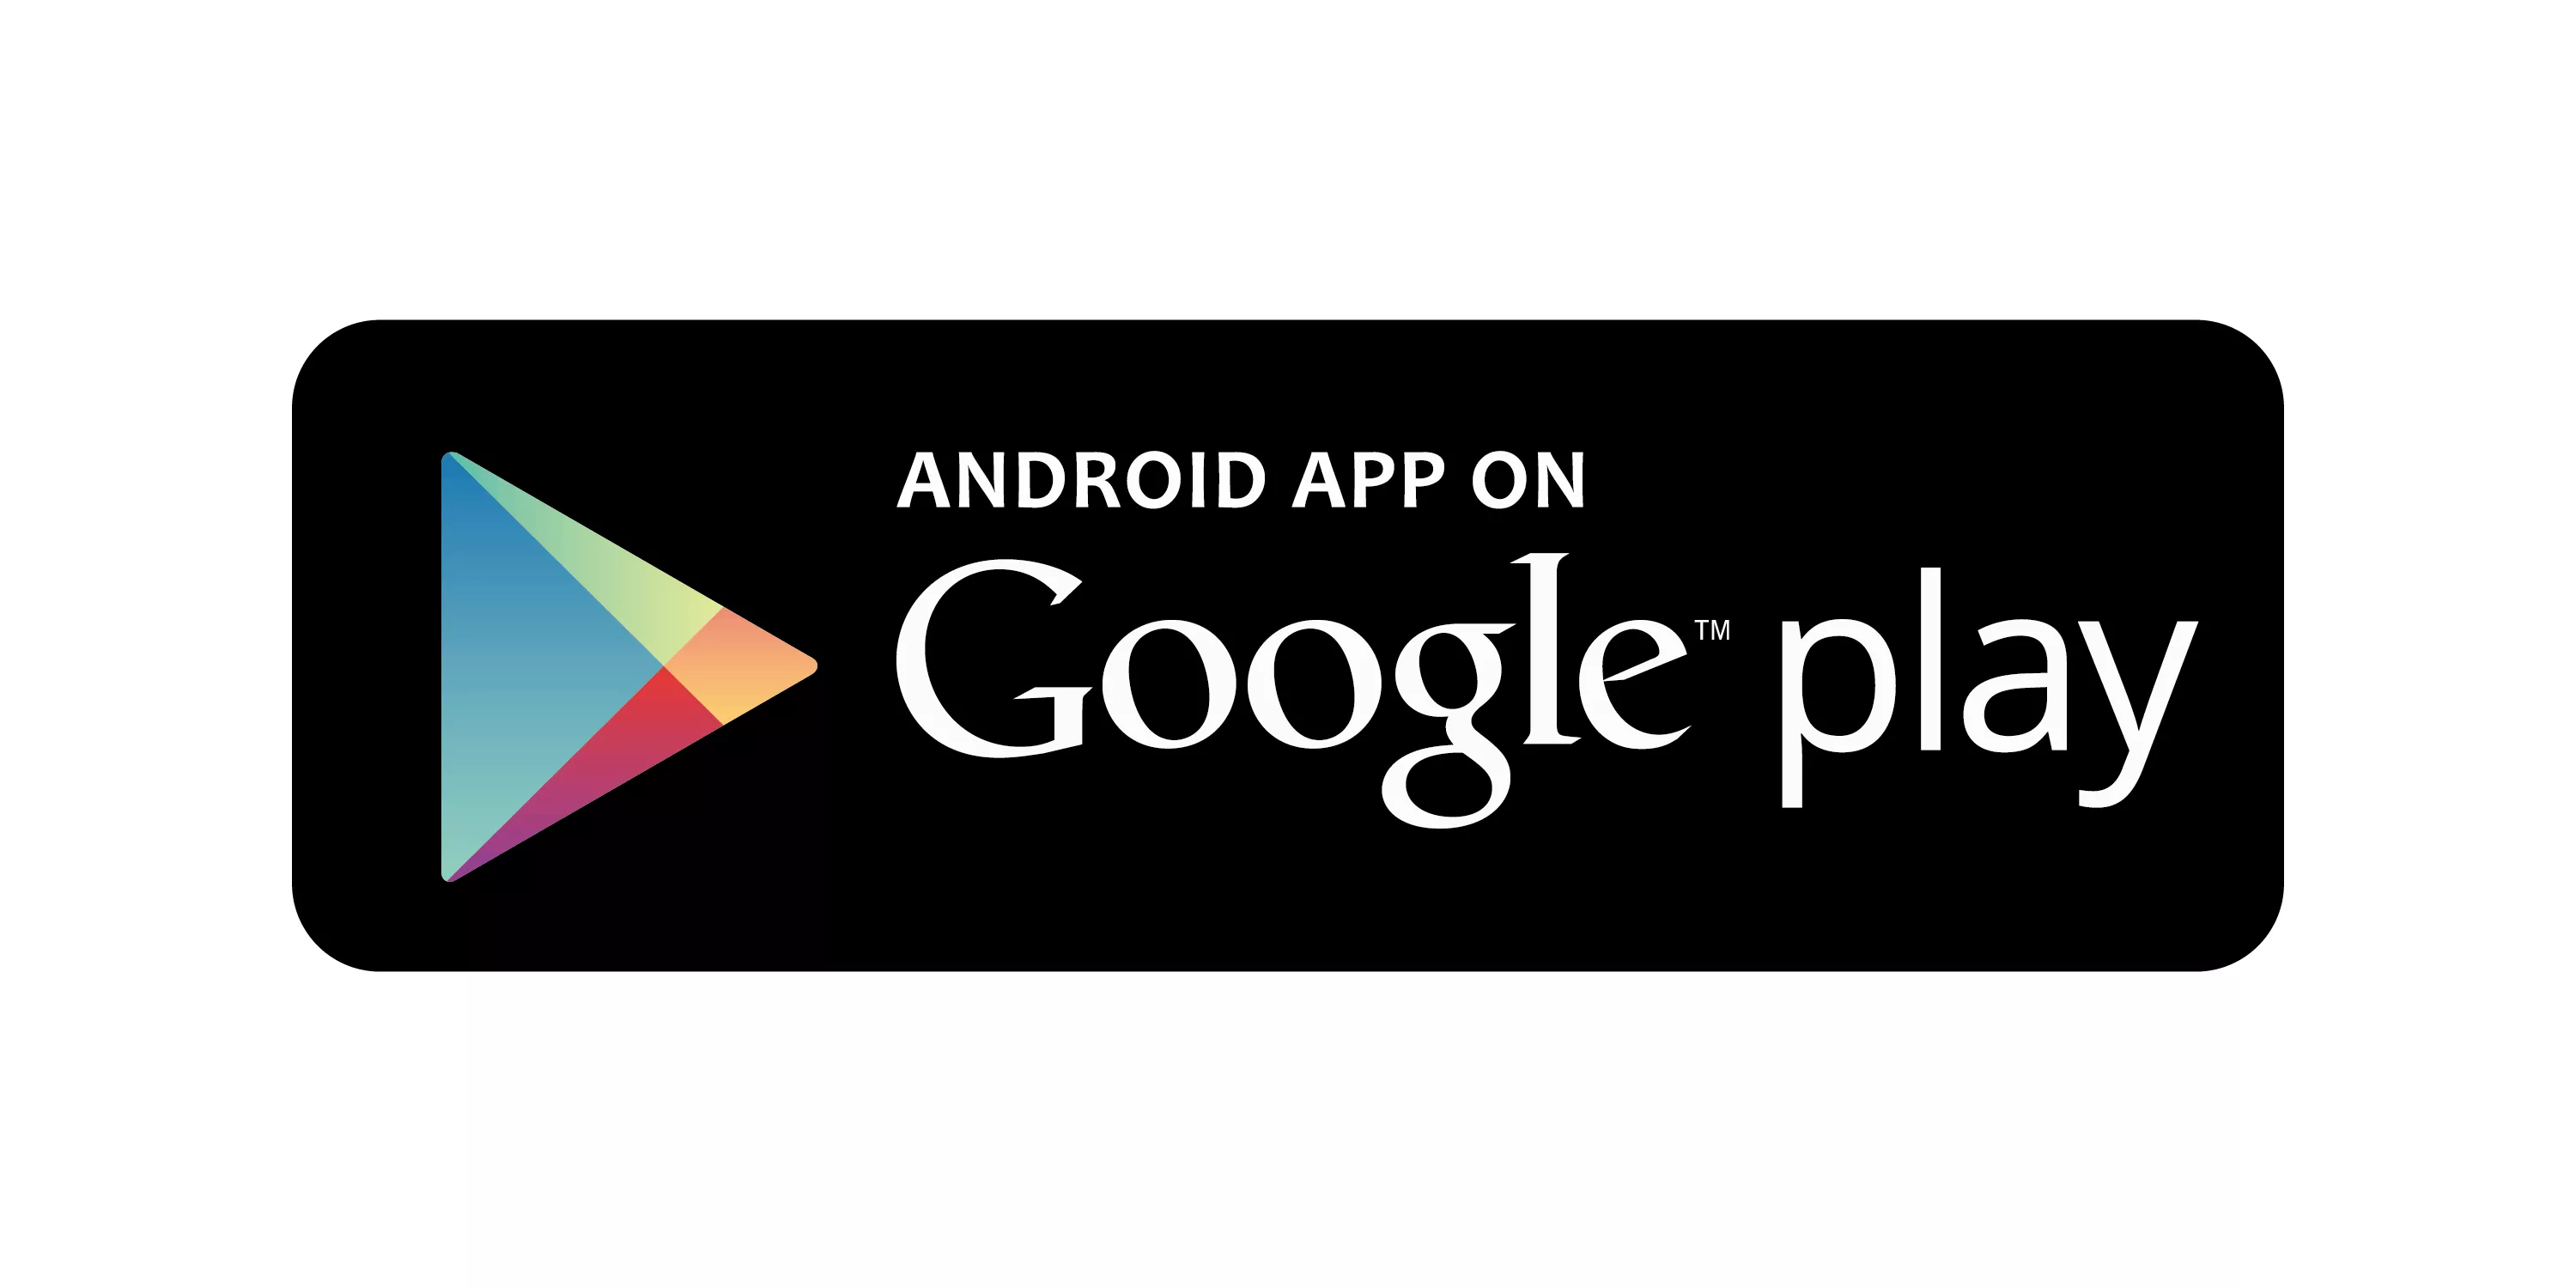
## We have to Predict the Rating According to his Features.

# Introduction
Google Play Store is a digital marketplace developed by Google for Android devices, offering a wide range of applications, games, movies, books, and other digital content. It serves as a platform for developers to distribute their products to millions of Android users worldwide.

With over 3 million apps available, Google Play Store caters to various user needs and preferences. It offers a diverse selection of categories such as productivity, communication, entertainment, education, health, and many more. Users can download and install apps directly to their Android devices, providing convenience and accessibility.

Google Play Store provides a user-friendly interface, allowing users to browse, search, and discover new apps and content. Each app listing includes detailed information, such as ratings, reviews, screenshots, and descriptions, to help users make informed decisions before downloading.

Developers benefit from the vast reach of Google Play Store, as it enables them to showcase and monetize their applications. They can leverage various monetization models, including selling apps, offering in-app purchases, displaying advertisements, or providing subscription services.

Google Play Store also incorporates user feedback and ratings, allowing users to provide reviews and rate their experience with apps. This feedback mechanism helps developers gather insights and improve their products over time.

Overall, Google Play Store plays a crucial role in the Android ecosystem, connecting developers and users, and providing a vast selection of apps and digital content for Android devices. It continues to evolve, introducing new features and enhancements to enhance the user experience and support the growth of the Android app ecosystem.

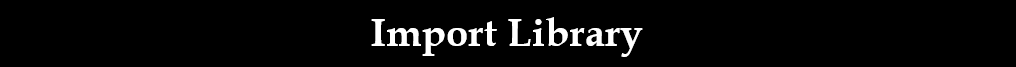

In [884]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import pylab
import missingno as mns
from sklearn.preprocessing import LabelEncoder,StandardScaler,Normalizer,RobustScaler,OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [885]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

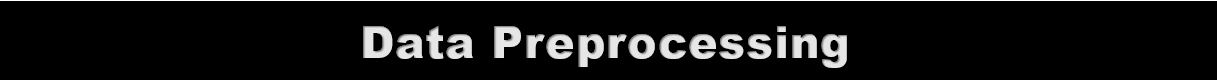

In [886]:
df=pd.read_csv("googleplaystore.csv")

In [887]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [888]:
df.shape

(10841, 13)

In [889]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [890]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [891]:
# its show the index number from starting to last
df.index

RangeIndex(start=0, stop=10841, step=1)

In [892]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [893]:
# its show the How many unique values are there
df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [894]:
# There are 33 unique value are there
df.Category.nunique()

34

In [895]:
# counting the value 
df.Category.value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [896]:
# In Category column in a value is the part of Rating so relace it
df[df["Category"]=="1.9"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [897]:
df.loc[10472,"Category"] = "ART_AND_DESIGN"
df.loc[10472,"Rating"] = 1.9

In [898]:
df.Category.value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           66
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

In [899]:
df.Rating.nunique()

39

In [900]:
df.Rating.unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [901]:
# Here is 39 Unique values in rating so its a Regression Problem 
#This id the Target column

In [902]:
# fill the Null value with the mean
mean=df.Rating.mean()
median=df.Rating.median()
print(f"The mean of the Rating  is : - {mean}")
print(f"The Median of the Rating is  :-  {median}")

The mean of the Rating  is : - 4.1915127575531175
The Median of the Rating is  :-  4.3


In [903]:
df.Rating.fillna(df.Rating.median(),inplace=True)

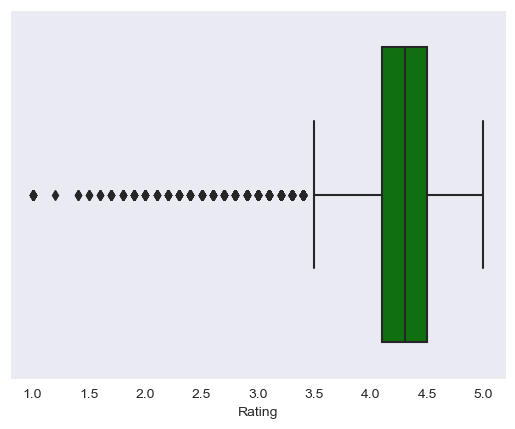

In [904]:
# Cheaking the Outliers in Rating
sns.boxplot(df.Rating,color="green");

In [905]:
df[df["Rating"]<3.5].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
87,RST - Sale of cars on the PCT,AUTO_AND_VEHICLES,3.2,250,1.1M,"100,000+",Free,0,Everyone,Auto & Vehicles,"April 27, 2018",1.4,4.0.3 and up
159,Cloud of Books,BOOKS_AND_REFERENCE,3.3,1862,19M,"1,000,000+",Free,0,Everyone,Books & Reference,"April 27, 2018",2.2.5,4.1 and up
176,Free Book Reader,BOOKS_AND_REFERENCE,3.4,1680,4.0M,"100,000+",Free,0,Everyone,Books & Reference,"August 20, 2016",3.05,4.0.3 and up
209,Plugin:AOT v5.0,BUSINESS,3.1,4034,23k,"100,000+",Free,0,Everyone,Business,"September 11, 2015",3.0.1.11 (Build 311),2.2 and up


In [906]:
df[df["Rating"]<3.5].shape

(734, 13)

In [907]:
# in Rating column less than 3.5 rating is only 734 out 10834 so its looks like outliers

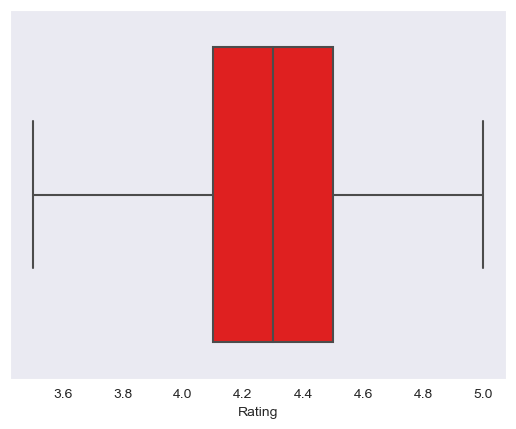

In [908]:
sns.boxplot(df[df["Rating"]>=3.5].Rating,color='r');

In [909]:
df[df["Rating"]>=3.5].Rating.unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.5, 5. ])

In [910]:
# Here is No outliers greater than equal to 3.5

In [911]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [912]:
# Reviews 

In [913]:
df.Reviews.dtypes

dtype('O')

In [914]:
df.Reviews.unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [915]:
df[df["Reviews"]=="3.0M"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,ART_AND_DESIGN,1.9,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [916]:
# I will drop this index values Because its a outlier
df.drop(index=10472,inplace=True)

In [917]:
group=df.groupby("Reviews")["Reviews"]

In [918]:
group.describe().T

Reviews    0    1  10  100  1000417  10006  100082  100130  100179  1002  \
count    596  272  64   10        2      1       1       1       1     2   
unique     1    1   1    1        1      1       1       1       1     1   
top        0    1  10  100  1000417  10006  100082  100130  100179  1002   
freq     596  272  64   10        2      1       1       1       1     2   

Reviews  1002859  1002861  1003269  10035  100406  1004709  10053186  10054  \
count          1        1        1      2       2        1         1      1   
unique         1        1        1      1       1        1         1      1   
top      1002859  1002861  1003269  10035  100406  1004709  10053186  10054   
freq           1        1        1      2       2        1         1      1   

Reviews  10055521  1006  100609  10067  1007  1008  1008012  100805  10088  \
count           1     1       1      1     2     1        1       1      1   
unique          1     1       1      1     1     1        1       1      1   
top      10055521  1006  100609  10067  1007  1008  1008012  100805  10088   
freq            1     1       1      1     2     1        1       1      1   

Reviews  10093  10097  100994  100997  101  1010  1011  10114  101163  10117  \
count        1      1       1       1    5     1     1      1       1      1   
unique       1      1       1       1    1     1     1      1       1      1   
top      10093  10097  100994  100997  101  1010  1011  10114  101163  10117   
freq         1      1       1       1    5     1     1      1       1      1   

Reviews  1012  1013  1013465  1013635  1013867  1013944  101455  1014822  \
count       2     1        1        1        1        1       1        1   
unique      1     1        1        1        1        1       1        1   
top      1012  1013  1013465  1013635  1013867  1013944  101455  1014822   
freq        2     1        1        1        1        1       1        1   

Reviews  1014846  1015  10158  10159  1016  101686  1017237  101738  1017408  \
count          1     2      1      2     1       1        1       1        1   
unique         1     1      1      1     1       1        1       1        1   
top      1014846  1015  10158  10159  1016  101686  1017237  101738  1017408   
freq           1     2      1      2     1       1        1       1        1   

Reviews  101762  1018  101883  1019  101957  10198  102  102107  10212  \
count         1     1       1     1       1      1    4       1      2   
unique        1     1       1     1       1      1    1       1      1   
top      101762  1018  101883  1019  101957  10198  102  102107  10212   
freq          1     1       1     1       1      1    4       1      2   

Reviews  10214862  10216538  10216997  10218  1022  102215  102248  10225  \
count           1         1         2      1     1       1       1      1   
unique          1         1         1      1     1       1       1      1   
top      10214862  10216538  10216997  10218  1022  102215  102248  10225   
freq            1         1         2      1     1       1       1      1   

Reviews  1024  102451  10247  10249  1025  10253  10256  102594  1026  10270  \
count       1       1      1      1     1      1      1       1     1      2   
unique      1       1      1      1     1      1      1       1     1      1   
top      1024  102451  10247  10249  1025  10253  10256  102594  1026  10270   
freq        1       1      1      1     1      1      1       1     1      2   

Reviews  102858  1028637  1028794  10291  102923  10295  103  10306  103064  \
count         1        1        1      1       1      2    5      1       1   
unique        1        1        1      1       1      1    1      1       1   
top      102858  1028637  1028794  10291  102923  10295  103  10306  103064   
freq          1        1        1      1       1      2    5      1       1   

Reviews  103074  103078  1031  1031045  10318  103199  1032  1032076  10323  \
count         1 

In [919]:
df["Reviews"]=df["Reviews"].astype(float)

In [920]:
df["Reviews"].min()

0.0

In [921]:
df.Reviews.value_counts().reset_index().T

0      1      2      3      4      5     6     7     8     9     \
index      0.0    1.0    2.0    3.0    4.0    5.0   6.0   7.0   8.0   9.0   
Reviews  596.0  272.0  214.0  175.0  137.0  108.0  97.0  90.0  74.0  65.0   

         10    11    12    13    14    15    16    17    18    19    20    \
index    10.0  12.0  11.0  13.0  17.0  14.0  19.0  16.0  21.0  20.0  15.0   
Reviews  64.0  60.0  52.0  49.0  48.0  41.0  41.0  35.0  35.0  35.0  31.0   

         21    22    23    24    25    26    27    28    29    30    31    \
index    30.0  25.0  24.0  38.0  18.0  22.0  23.0  27.0  28.0  33.0  41.0   
Reviews  30.0  30.0  30.0  29.0  27.0  26.0  25.0  25.0  24.0  24.0  22.0   

         32    33    34    35    36    37    38    39    40    41    42    \
index    26.0  29.0  32.0  31.0  39.0  35.0  48.0  45.0  37.0  54.0  36.0   
Reviews  22.0  20.0  20.0  19.0  18.0  18.0  17.0  17.0  17.0  17.0  17.0   

         43    44    45    46    47    48    49    50    51    52     53    \
index    44.0  40.0  52.0  64.0  34.0  43.0  53.0  78.0  55.0  66.0  114.0   
Reviews  16.0  15.0  15.0  15.0  14.0  14.0  14.0  13.0  13.0  13.0   13.0   

         54    55    56    57    58    59    60    61    62    63    64    \
index    69.0  67.0  57.0  42.0  47.0  60.0  51.0  80.0  88.0  65.0  46.0   
Reviews  13.0  13.0  12.0  12.0  12.0  12.0  12.0  12.0  12.0  11.0  11.0   

         65    66    67    68    69    70    71    72     73    74    75    \
index    59.0  87.0  63.0  83.0  75.0  70.0  49.0  85.0  124.0  97.0  58.0   
Reviews  11.0  11.0  11.0  11.0  11.0  11.0  11.0  10.0   10.0  10.0  10.0   

          76     77     78     79    80     81    82     83     84    85    \
index    125.0  168.0  131.0  100.0  56.0  214.0  76.0  253.0  159.0  91.0   
Reviews   10.0   10.0   10.0   10.0  10.0    9.0   9.0    9.0    9.0   9.0   

          86    87    88    89     90     91     92     93     94     95    \
index    218.0  71.0  61.0  96.0  160.0  142.0  105.0  382.0  120.0  128.0   
Reviews    9.0   9.0   9.0   8.0    8.0    8.0    8.0    8.0    8.0    8.0   

         96    97    98     99     100    101    102   103   104    105   \
index    89.0  82.0  62.0  117.0  133.0  265.0  126.0  77.0  86.0  496.0   
Reviews   8.0   8.0   8.0    8.0    8.0    8.0    7.0   7.0   7.0    7.0   

         106    107   108    109   110   111    112    113    114   115   \
index    73.0  112.0  93.0  146.0  84.0  50.0  127.0  104.0  315.0  90.0   
Reviews   7.0    7.0   7.0    7.0   7.0   7.0    7.0    7.0    7.0   6.0   

          116    117   118    119    120    121    122    123    124    125   \
index    182.0  164.0  92.0  109.0  185.0  145.0  129.0  123.0  196.0  107.0   
Reviews    6.0    6.0   6.0    6.0    6.0    6.0    6.0    6.0    6.0    6.0   

          126    127    128    129   130    131    132    133    134    135   \
index    163.0  190.0  174.0  144.0  68.0  130.0  314.0  198.0  197.0  283.0   
Reviews    6.0    6.0    6.0    6.0   6.0    6.0    6.0    6.0    6.0    6.0   

          136    137    138    139    140    141    142     143    144   \
index    143.0  162.0  110.0  236.0  211.0  155.0  175.0  3596.0  623.0   
Reviews    5.0    5.0    5.0    5.0    5.0    5.0    5.0     5.0    5.0   

          145    146    147    148    149   150    151    152    153    154   \
index    499.0  103.0  206.0  216.0  199.0  72.0  141.0  244.0  116.0  115.0   
Reviews    5.0    5.0    5.0    5.0    5.0   5.0    5.0    5.0    5.0    5.0   

          155    156    157    158    159    160    161    162    163    164   \
index    285.0  213.0  256.0  302.0  275.0  201.0  154.0  169.0  101.0  171.0   
Reviews    5.0    5.0    5.0    5.0    5.0    5.0    5.0    5.0    5.0    5.0   

          165   166    167    168    169    170     171   172    173    174   \
index    119.0  99.0  492.0  250.0  319.0  138.0  1288.0  79.0  513.0  118.0   
Reviews    5.0   5.0    5.0    5.0    5.0    5.0     5.0   5.0    5.0    5.0   

          175    1

In [922]:
df["Reviews"].max()

78158306.0

In [923]:
df[df["Reviews"]<100].shape

(3367, 13)

In [924]:
df[(df["Reviews"]>10000)&(df["Reviews"]<100000)].shape

(2111, 13)

In [925]:
df[(df["Reviews"]>100)&(df["Reviews"]<10000)].shape

(3183, 13)

In [926]:
df[(df["Reviews"]>100000)&(df["Reviews"]<10000000)].shape

(2077, 13)

In [927]:
3367+2111+3183+2077

10738

In [928]:
L=[]
for i in df["Reviews"]:
    if i<100:
        L.append(100)
    elif i>=100 and i<10000:
        L.append(10000)
    elif i>=10000 and i<100000:
        L.append(100000)
    elif i>=100000:
        L.append(2000000)
    else:
        L.append(250000)
        

In [929]:
df["Reviews"]=L

In [930]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,10000,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,10000,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,100000,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,2000000,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,10000,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [931]:
df["Reviews"].unique()

array([  10000,  100000, 2000000,     100], dtype=int64)

In [932]:
df["Reviews"].value_counts()

100        3367
10000      3193
2000000    2169
100000     2111
Name: Reviews, dtype: int64

In [933]:
df["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [934]:
def convert_to_kilobytes(size):
    if 'M' in size:
        size = float(size.replace('M', '')) * 1024
    elif 'k' in size:
        size = float(size.replace('k', ''))
    return size

df['Size'] = df['Size'].apply(convert_to_kilobytes)

In [935]:
df.Size.unique()

array([19456.0, 14336.0, 8908.8, 25600.0, 2867.2, 5734.4, 29696.0,
       33792.0, 3174.4, 28672.0, 12288.0, 20480.0, 21504.0, 37888.0,
       2764.8, 5632.0, 17408.0, 39936.0, 31744.0, 4300.8, 7168.0, 23552.0,
       6144.0, 6246.4, 4710.4, 9420.8, 5324.8, 11264.0, 24576.0,
       'Varies with device', 9625.6, 15360.0, 10240.0, 1228.8, 26624.0,
       8192.0, 8089.6, 57344.0, 58368.0, 35840.0, 55296.0, 201.0, 3686.4,
       5836.8, 8806.4, 2457.6, 27648.0, 2560.0, 16384.0, 3481.6, 9113.6,
       3993.6, 2969.6, 38912.0, 32768.0, 5529.6, 18432.0, 1126.4, 2252.8,
       4608.0, 10035.2, 53248.0, 9216.0, 6860.8, 30720.0, 2662.4, 7270.4,
       3788.8, 22528.0, 7577.6, 6553.6, 3276.8, 8396.8, 10137.6, 5017.6,
       9728.0, 5120.0, 6041.6, 13312.0, 74752.0, 6963.2, 3584.0, 4096.0,
       2355.2, 7372.8, 2150.4, 43008.0, 7475.2, 9318.4, 56320.0, 23.0,
       6656.0, 1536.0, 7680.0, 52224.0, 41984.0, 49152.0, 8704.0, 47104.0,
       8499.2, 4403.2, 4812.8, 3379.2, 40960.0, 7987.2, 9011.2, 6

In [936]:
df[df["Size"]=='Varies with device'].shape

(1695, 13)

In [937]:
df["Size"] = df["Size"].replace("Varies with device", 0.0)

In [938]:
df.nunique()

App               9659
Category            33
Rating              39
Reviews              4
Size               460
Installs            21
Type                 2
Price               92
Content Rating       6
Genres             119
Last Updated      1377
Current Ver       2831
Android Ver         33
dtype: int64

In [939]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [940]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,100,54272.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,100,3686.4,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,100,9728.0,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,10000,0.0,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,2000000,19456.0,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [941]:
df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [942]:
df["Installs"] = df["Installs"].str.replace("+","").str.replace(",","").astype(float)

In [943]:
install_range = []

for val in df["Installs"]:
    if val< 10000:
        install_range.append("0 - 10k")
    elif val>=10000 and val<=50000:
        install_range.append("10k - 50k")
    elif val>=50000 and val<=100000:
        install_range.append("50k - 100k")
    elif val>=100000 and val<=500000:
        install_range.append("100k - 500k")
    elif val>=500000  and val<=1000000:
        install_range.append("500k - 1000k")
    elif val>=1000000 and val<=5000000:
        install_range.append("1000k - 5000k")
    elif val>5000000 and val<=10000000:
        install_range.append("5000k - 10000k")
    elif val>10000000:
        install_range.append("10000k+")

In [944]:
df["Installs"] = install_range

In [945]:
df["Installs"].value_counts()

0 - 10k           3188
500k - 1000k      1579
10k - 50k         1533
5000k - 10000k    1252
50k - 100k        1169
10000k+            828
1000k - 5000k      752
100k - 500k        539
Name: Installs, dtype: int64

In [946]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,10000,19456.0,10k - 50k,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,10000,14336.0,100k - 500k,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,100000,8908.8,1000k - 5000k,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,2000000,25600.0,10000k+,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,10000,2867.2,50k - 100k,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [947]:
df.Type.unique()

array(['Free', 'Paid', nan], dtype=object)

In [948]:
df.Type.isna().sum()

1

In [949]:
df[df['Type'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.3,100,0.0,0 - 10k,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [950]:
df["Type"].mode()

0    Free
Name: Type, dtype: object

In [951]:
df["Type"].fillna(df.Type.mode()[0],inplace=True)

In [952]:
df.Type.isna().sum()

0

In [953]:
df.tail(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10838,Parkinson Exercices FR,MEDICAL,4.3,100,9728.0,0 - 10k,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,10000,0.0,0 - 10k,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,2000000,19456.0,5000k - 10000k,Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [954]:
df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [955]:
df["Price"] = df["Price"].str.replace("$","").astype(float)

In [956]:
df.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [957]:
df.Price.nunique()

92

In [958]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,10000,19456.0,10k - 50k,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,10000,14336.0,100k - 500k,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,100000,8908.8,1000k - 5000k,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,2000000,25600.0,10000k+,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,10000,2867.2,50k - 100k,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [959]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [960]:
df[df["Content Rating"]=="Unrated"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7312,Best CG Photography,FAMILY,4.3,100,2560.0,0 - 10k,Free,0.0,Unrated,Entertainment,"June 24, 2015",5.2,3.0 and up
8266,DC Universe Online Map,TOOLS,4.1,10000,6553.6,10k - 50k,Free,0.0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up


In [961]:
df.loc[8266,"Content Rating"] = "Everyone"
df.loc[7312,"Content Rating"] = "Everyone"

In [962]:
df["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+'], dtype=object)

In [963]:
df["Content Rating"].value_counts()

Everyone           8716
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Name: Content Rating, dtype: int64

In [964]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,10000,19456.0,10k - 50k,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,10000,14336.0,100k - 500k,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,100000,8908.8,1000k - 5000k,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,2000000,25600.0,10000k+,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,10000,2867.2,50k - 100k,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [965]:
df["Genres"].nunique()

119

In [966]:
df["Genres"].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [967]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,10000,19456.0,10k - 50k,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,10000,14336.0,100k - 500k,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,100000,8908.8,1000k - 5000k,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,2000000,25600.0,10000k+,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,10000,2867.2,50k - 100k,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [968]:
df["Last Updated"].isna().sum()

0

In [969]:
df["Last Updated"].nunique()

1377

In [970]:
df["Last_Updated_Year"] = df["Last Updated"].apply(lambda x: x.split()[-1])

In [971]:
df["Last_Updated_Year"]=df["Last_Updated_Year"].astype(int)

In [972]:
df["Last_Updated_Year"].unique()

array([2018, 2017, 2014, 2016, 2015, 2013, 2012, 2011, 2010])

In [973]:
df["Last_Updated_Month"] = df["Last Updated"].apply(lambda x: x.split()[0])

In [974]:
df["Last_Updated_Month"].unique()

array(['January', 'August', 'June', 'March', 'April', 'September', 'July',
       'October', 'November', 'May', 'December', 'February'], dtype=object)

In [975]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last_Updated_Year,Last_Updated_Month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,10000,19456.0,10k - 50k,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018,January
1,Coloring book moana,ART_AND_DESIGN,3.9,10000,14336.0,100k - 500k,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2018,January
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,100000,8908.8,1000k - 5000k,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,2018,August
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,2000000,25600.0,10000k+,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,2018,June
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,10000,2867.2,50k - 100k,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2018,June


In [976]:
df["Current Ver"].isnull().sum()

8

In [977]:
print(df["Current Ver"].unique())

['1.0.0' '2.0.0' '1.2.4' ... '1.0.612928' '0.3.4' '2.0.148.0']


In [978]:
print(df["Current Ver"].nunique())

2831


In [979]:
df["Current Ver"].fillna(df["Current Ver"].mode()[0],inplace=True)

In [980]:
print(df["Current Ver"].unique())

['1.0.0' '2.0.0' '1.2.4' ... '1.0.612928' '0.3.4' '2.0.148.0']


In [981]:
list1 = []

for val in df["Current Ver"]:
    if val.replace(".","").isdigit():
        list1.append(val)
    else:
        if val == "Varies with device":
            list1.append("0.0")
        else:
            for i in val:
                if i.isalpha():
                    val = val.replace(i,"")
            list1.append(val)

In [982]:
len(list1)

10840

In [983]:
df["Current Ver"] = list1

In [984]:
list2 = []
for val in df["Current Ver"]:
    if val.replace(".","").isdigit():
        list2.append(val[0:3])
    else:
        val = val.replace("_","")
        val = val.replace("-","")
        val = val.replace("+","")
        val = val.replace(" ","")
        val = val.replace("(","")
        val = val.replace(" (","")
        val = val.replace(")","")
        val = val.replace("|","")
        val = val.replace("/","")
        val = val.replace(":","")
        
        if val == "":
            list2.append(np.nan)
        else:
            list2.append((val[0:3]))

In [985]:
df["Current Ver"] = df["Current Ver"].apply(lambda x: x[0:3])

In [986]:
df['Current Ver'].unique()

array(['1.0', '2.0', '1.2', '0.0', '1.1', '6.1', '2.9', '2.8', '3.8',
       '3.1', '2.2', '5.5', '4.0', '1.5', '6.0', '6.7', '1.6', '2.1',
       '1.3', '1', '1.4', '11.', '3.0', '1.7', '2.5', '2.4', '1.9', '0.2',
       '4.4', '2.3', '8.3', '10.', '3.2', '4.6', '5.4', '8.0', '3.3',
       '18.', '9.1', '15.', '5.0', '9.0', '14.', '7.0', '3.9', '3.4',
       '9.7', '4.9', '5.2', '3.5', '7.3', '5.1', '4.1', '99.', '12.',
       '0.9', '6.4', '3.7', '2.6', '4.3', '6.3', '4.7', '4.2', '1.8',
       '37.', '9.8', '24.', '47.', '69.', '7.5', '9.9', '42.', '0.1',
       '7.7', '7.2', '6.5', '5.6', '4.5', '5.8', '196', '8.1', '201',
       '6.6', '4.8', '8.7', '3.6', '5.3', '8.2', '1.', '2', '20.', '10',
       '5.7', '13.', '8.5', '01.', '43', '16.', '8.4', ' 3.', '6.8',
       '6.2', '2.7', '5.9', '7.8', '7.1', '7.9', '112', '37', '8.8', '.',
       '7.4', '9.6', '220', '858', ':6.', '02.', '9.4', '319', '542',
       '0.7', '0.5', '19.', '1_3', '79.', '108', '8', '57.', '60', '149',
     

In [987]:
# Here i am going to drop this column because this feature is not much impactful for the mcahine learning model
df.drop(columns=["Current Ver"],inplace=True)

In [988]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver,Last_Updated_Year,Last_Updated_Month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,10000,19456.0,10k - 50k,Free,0.0,Everyone,Art & Design,"January 7, 2018",4.0.3 and up,2018,January
1,Coloring book moana,ART_AND_DESIGN,3.9,10000,14336.0,100k - 500k,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",4.0.3 and up,2018,January
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,100000,8908.8,1000k - 5000k,Free,0.0,Everyone,Art & Design,"August 1, 2018",4.0.3 and up,2018,August
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,2000000,25600.0,10000k+,Free,0.0,Teen,Art & Design,"June 8, 2018",4.2 and up,2018,June
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,10000,2867.2,50k - 100k,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",4.4 and up,2018,June


In [989]:
df["Android Ver"].isna().sum()

2

In [990]:
df["Android Ver"].fillna(df["Android Ver"].mode()[0],inplace=True)

In [991]:
df["Android Ver"].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [992]:
df["Android Ver"] = df["Android Ver"].apply(lambda x: x[0:3])

In [993]:
df["Android Ver"].unique()

array(['4.0', '4.2', '4.4', '2.3', '3.0', '4.1', 'Var', '2.2', '5.0',
       '6.0', '1.6', '1.5', '2.1', '7.0', '5.1', '4.3', '2.0', '3.2',
       '7.1', '8.0', '3.1', '1.0'], dtype=object)

In [994]:
df["Android Ver"] = df["Android Ver"].replace("Var","0.0")

In [995]:
df["Android Ver"] = df["Android Ver"].astype(float)

In [996]:
df["Android Ver"].unique()

array([4. , 4.2, 4.4, 2.3, 3. , 4.1, 0. , 2.2, 5. , 6. , 1.6, 1.5, 2.1,
       7. , 5.1, 4.3, 2. , 3.2, 7.1, 8. , 3.1, 1. ])

In [997]:
df["Android Ver"].value_counts().reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
index,4.0,4.1,0.0,4.4,2.3,5.0,4.2,2.2,4.3,3.0,2.1,1.6,6.0,7.0,2.0,3.2,5.1,1.5,3.1,8.0,7.1,1.0
Android Ver,2878.0,2454.0,1362.0,992.0,933.0,605.0,394.0,245.0,243.0,241.0,134.0,116.0,60.0,43.0,39.0,36.0,24.0,20.0,10.0,6.0,3.0,2.0


In [998]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver,Last_Updated_Year,Last_Updated_Month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,10000,19456.0,10k - 50k,Free,0.0,Everyone,Art & Design,"January 7, 2018",4.0,2018,January
1,Coloring book moana,ART_AND_DESIGN,3.9,10000,14336.0,100k - 500k,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",4.0,2018,January
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,100000,8908.8,1000k - 5000k,Free,0.0,Everyone,Art & Design,"August 1, 2018",4.0,2018,August
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,2000000,25600.0,10000k+,Free,0.0,Teen,Art & Design,"June 8, 2018",4.2,2018,June
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,10000,2867.2,50k - 100k,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",4.4,2018,June


In [999]:
df.drop(columns=["App","Last Updated"],inplace=True)

In [1000]:
df["Last_Updated_Month"].replace({"January":1,"February":2,"March":3,"April":4,"May":5,"June":6,"July":7,
                                  "August":8,"September":9,"October":10,"November":11,"December":12},inplace=True)

In [1001]:
df=df.reset_index(drop=True)

In [1002]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver,Last_Updated_Year,Last_Updated_Month
0,ART_AND_DESIGN,4.1,10000,19456.0,10k - 50k,Free,0.0,Everyone,Art & Design,4.0,2018,1
1,ART_AND_DESIGN,3.9,10000,14336.0,100k - 500k,Free,0.0,Everyone,Art & Design;Pretend Play,4.0,2018,1
2,ART_AND_DESIGN,4.7,100000,8908.8,1000k - 5000k,Free,0.0,Everyone,Art & Design,4.0,2018,8
3,ART_AND_DESIGN,4.5,2000000,25600.0,10000k+,Free,0.0,Teen,Art & Design,4.2,2018,6
4,ART_AND_DESIGN,4.3,10000,2867.2,50k - 100k,Free,0.0,Everyone,Art & Design;Creativity,4.4,2018,6


In [1003]:
df["Last_Updated_Month"].unique()

array([ 1,  8,  6,  3,  4,  9,  7, 10, 11,  5, 12,  2], dtype=int64)

In [1004]:
df.corr()

,Rating,Reviews,Size,Price,Android Ver,Last_Updated_Year,Last_Updated_Month
Rating,1.000000,0.179718,0.037089,-0.019318,-0.024828,0.124260,0.013420
Reviews,0.179718,1.000000,0.131874,-0.033293,-0.233232,0.195884,0.099284
Size,0.037089,0.131874,1.000000,-0.013459,0.315863,0.139380,0.014359
Price,-0.019318,-0.033293,-0.013459,1.000000,0.020506,-0.007897,0.006943
Android Ver,-0.024828,-0.233232,0.315863,0.020506,1.000000,0.152037,-0.042503
Last_Updated_Year,0.124260,0.195884,0.139380,-0.007897,0.152037,1.000000,-0.187306
Last_Updated_Month,0.013420,0.099284,0.014359,0.006943,-0.042503,-0.187306,1.000000


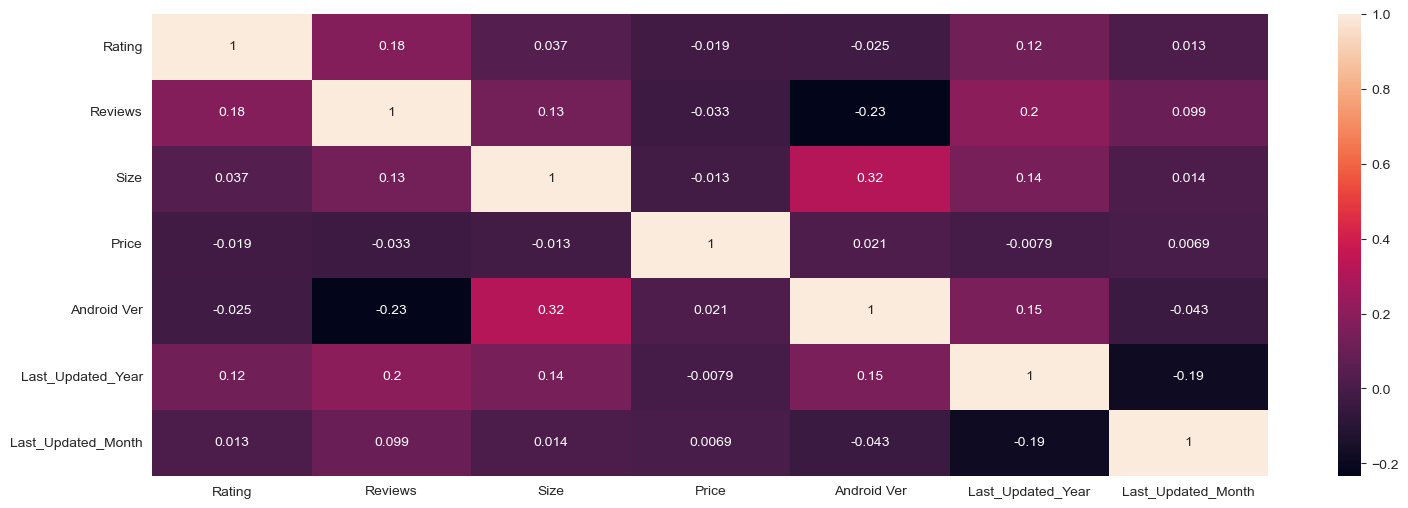

In [1005]:
plt.figure(figsize=(18,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [1006]:
df.corr()["Rating"]

Rating                1.000000
Reviews               0.179718
Size                  0.037089
Price                -0.019318
Android Ver          -0.024828
Last_Updated_Year     0.124260
Last_Updated_Month    0.013420
Name: Rating, dtype: float64

In [1007]:
# Here i'm Not getting any co relation between the features and Target 

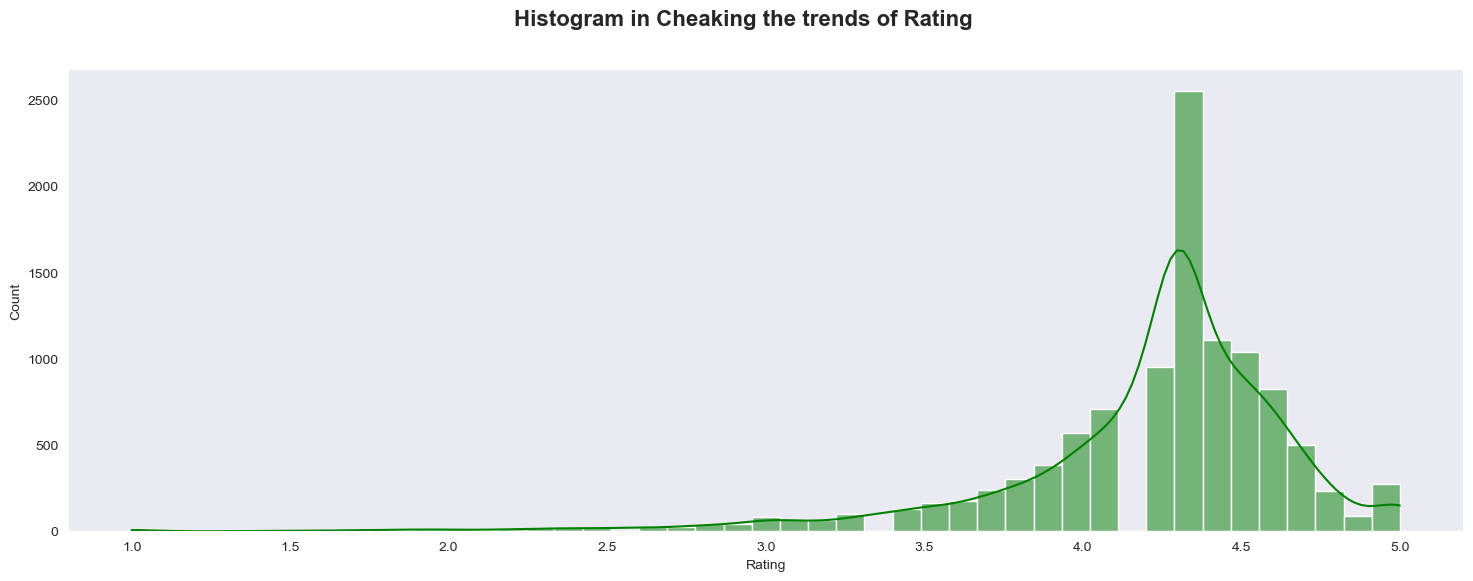

In [1008]:
plt.figure(figsize=(18,6))
#plt.subplot(1,2,1)
sns.histplot(data=df,x="Rating",bins=45,color="green",kde=True)
#plt.subplot(1,2,2)
#sns.histplot(data=df,x="Category",bins=45,color="red",kde=True)
#plt.xticks(rotation=90)
plt.suptitle("Histogram in Cheaking the trends of Rating",fontsize=16,fontweight="bold")
plt.show()

In [1009]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver,Last_Updated_Year,Last_Updated_Month
0,ART_AND_DESIGN,4.1,10000,19456.0,10k - 50k,Free,0.0,Everyone,Art & Design,4.0,2018,1
1,ART_AND_DESIGN,3.9,10000,14336.0,100k - 500k,Free,0.0,Everyone,Art & Design;Pretend Play,4.0,2018,1
2,ART_AND_DESIGN,4.7,100000,8908.8,1000k - 5000k,Free,0.0,Everyone,Art & Design,4.0,2018,8
3,ART_AND_DESIGN,4.5,2000000,25600.0,10000k+,Free,0.0,Teen,Art & Design,4.2,2018,6
4,ART_AND_DESIGN,4.3,10000,2867.2,50k - 100k,Free,0.0,Everyone,Art & Design;Creativity,4.4,2018,6


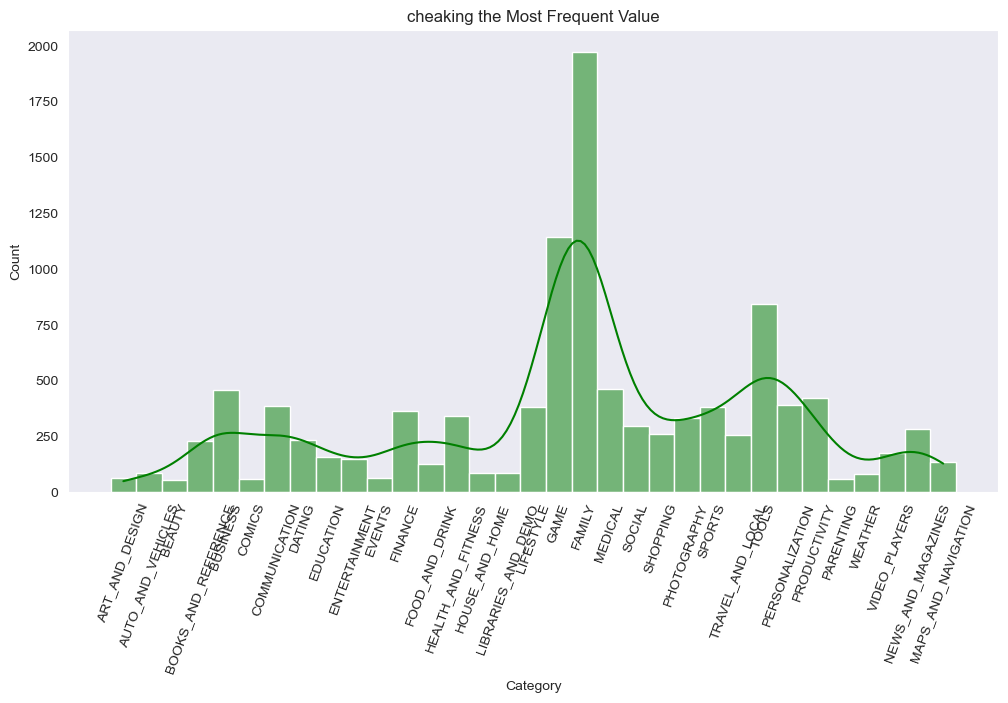

In [1010]:
sns.set_style("dark")
plt.figure(figsize=(12,6))
sns.histplot(df["Category"],bins=45,color="green",kde=True)
plt.xticks(rotation=70)
plt.title("cheaking the Most Frequent Value")
plt.show()

In [1011]:
# Target Encoding
df["Category"]=df.groupby("Category")["Rating"].transform("mean")

Target Encoding: Target encoding, also known as mean encoding, uses the target variable to encode the categories. It replaces each unique category with the average value of the target variable for that category. Target encoding can capture the relationship between the categorical variable and the target variable, making it useful for prediction tasks. However, it's important to be cautious with target encoding to avoid overfitting, as the target leakage might occur if not applied properly.

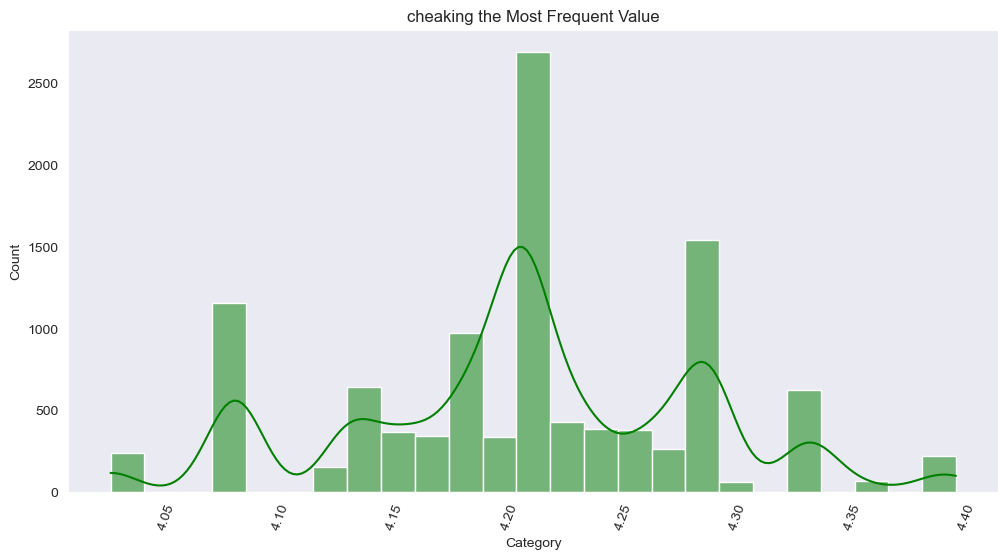

In [1012]:
sns.set_style("dark")
plt.figure(figsize=(12,6))
sns.histplot(df["Category"],bins=25,color="green",kde=True)
plt.xticks(rotation=70)
plt.title("cheaking the Most Frequent Value")
plt.show()

In [1013]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver,Last_Updated_Year,Last_Updated_Month
0,4.355385,4.1,10000,19456.0,10k - 50k,Free,0.0,Everyone,Art & Design,4.0,2018,1
1,4.355385,3.9,10000,14336.0,100k - 500k,Free,0.0,Everyone,Art & Design;Pretend Play,4.0,2018,1
2,4.355385,4.7,100000,8908.8,1000k - 5000k,Free,0.0,Everyone,Art & Design,4.0,2018,8
3,4.355385,4.5,2000000,25600.0,10000k+,Free,0.0,Teen,Art & Design,4.2,2018,6
4,4.355385,4.3,10000,2867.2,50k - 100k,Free,0.0,Everyone,Art & Design;Creativity,4.4,2018,6


In [1014]:
df["Installs"].value_counts()

0 - 10k           3188
500k - 1000k      1579
10k - 50k         1533
5000k - 10000k    1252
50k - 100k        1169
10000k+            828
1000k - 5000k      752
100k - 500k        539
Name: Installs, dtype: int64

In [1015]:
# count Encoding
df["Installs"]=df["Installs"].map(df["Installs"].value_counts())

In [1016]:
df["Installs"].value_counts()

3188    3188
1579    1579
1533    1533
1252    1252
1169    1169
828      828
752      752
539      539
Name: Installs, dtype: int64

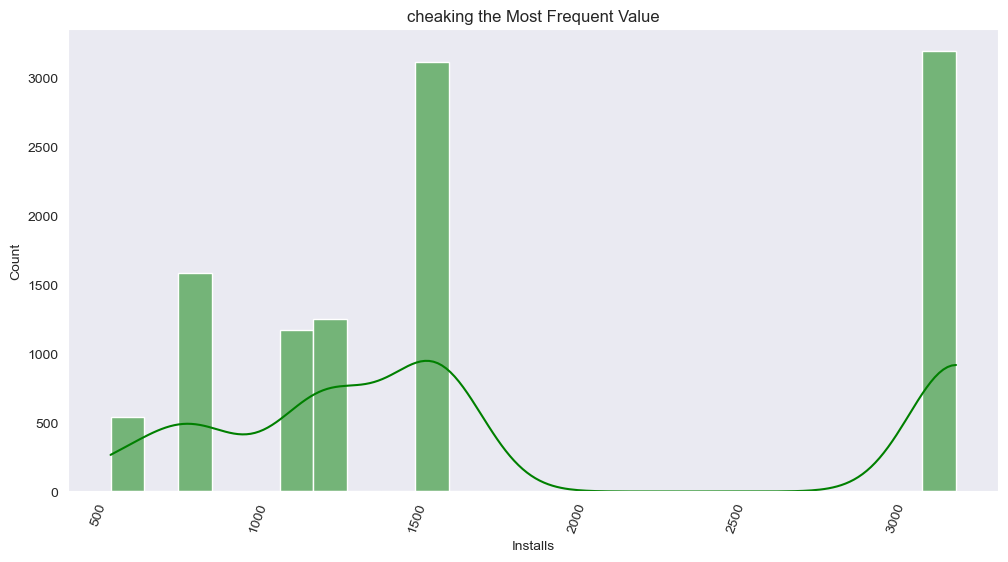

In [1017]:
sns.set_style("dark")
plt.figure(figsize=(12,6))
sns.histplot(df["Installs"],bins=25,color="green",kde=True)
plt.xticks(rotation=70)
plt.title("cheaking the Most Frequent Value")
plt.show()

In [1018]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver,Last_Updated_Year,Last_Updated_Month
0,4.355385,4.1,10000,19456.0,1533,Free,0.0,Everyone,Art & Design,4.0,2018,1
1,4.355385,3.9,10000,14336.0,539,Free,0.0,Everyone,Art & Design;Pretend Play,4.0,2018,1
2,4.355385,4.7,100000,8908.8,752,Free,0.0,Everyone,Art & Design,4.0,2018,8
3,4.355385,4.5,2000000,25600.0,828,Free,0.0,Teen,Art & Design,4.2,2018,6
4,4.355385,4.3,10000,2867.2,1169,Free,0.0,Everyone,Art & Design;Creativity,4.4,2018,6


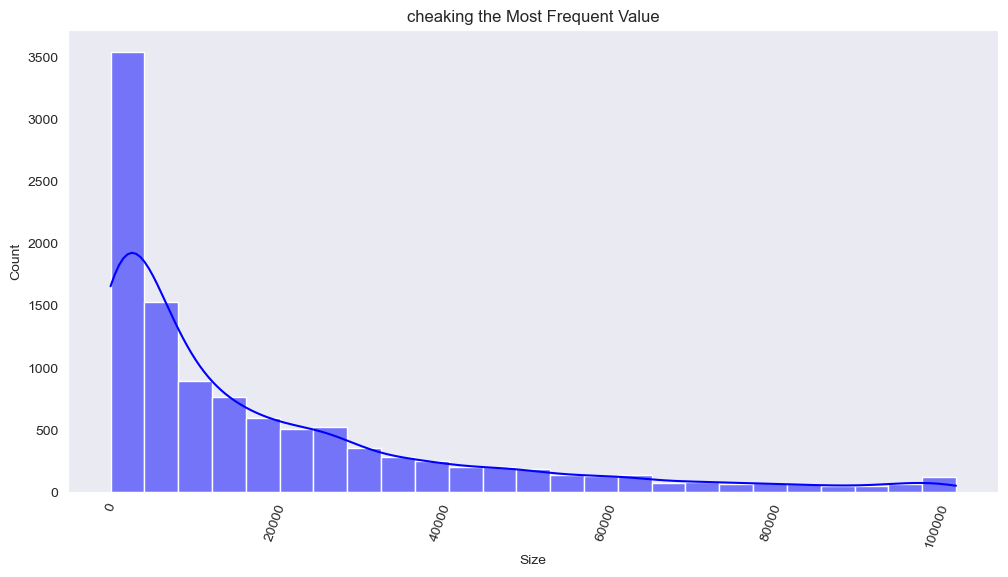

In [1019]:
sns.set_style("dark")
plt.figure(figsize=(12,6))
sns.histplot(df["Size"],bins=25,color="blue",kde=True)
plt.xticks(rotation=70)
plt.title("cheaking the Most Frequent Value")
plt.show()

In [1020]:
#This mathematical function helps user to calculate cube root of x for all x being the array elements.
df["Size"] = np.cbrt(df["Size"])

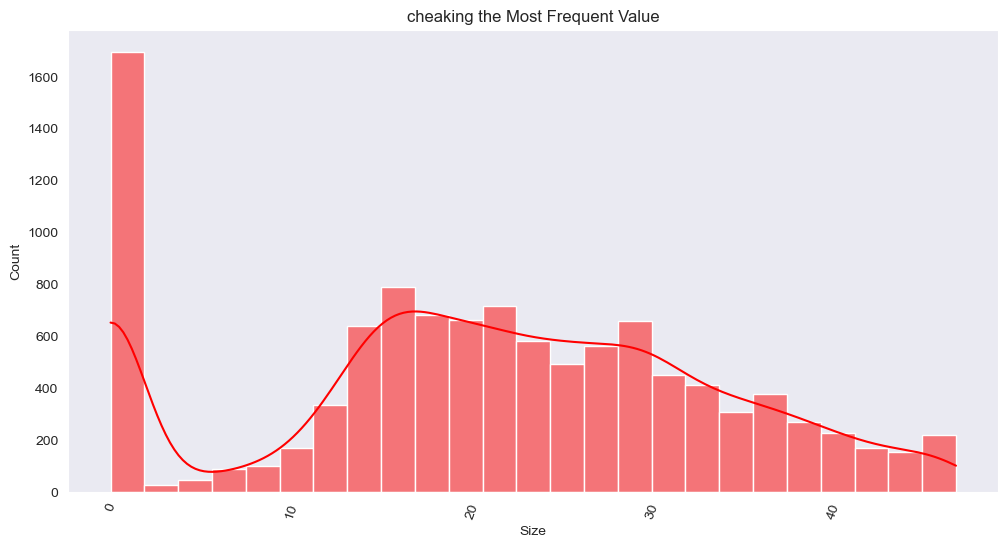

In [1021]:
sns.set_style("dark")
plt.figure(figsize=(12,6))
sns.histplot(df["Size"],bins=25,color="red",kde=True)
plt.xticks(rotation=70)
plt.title("cheaking the Most Frequent Value")
plt.show()

# After applying the np.cbrt
* This mathematical function helps user to calculate cube root of x for all x being the array elements.

In [1022]:
df.tail()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver,Last_Updated_Year,Last_Updated_Month
10835,4.204564,4.5,100,37.860988,3188,Free,0.0,Everyone,Education,4.1,2017,7
10836,4.204564,5.0,100,15.447830,3188,Free,0.0,Everyone,Education,4.1,2018,7
10837,4.216199,4.3,100,21.347213,3188,Free,0.0,Everyone,Medical,2.2,2017,1
10838,4.335498,4.5,10000,0.000000,3188,Free,0.0,Mature 17+,Books & Reference,0.0,2015,1
10839,4.131414,4.5,2000000,26.895803,1252,Free,0.0,Everyone,Lifestyle,0.0,2018,7


In [1023]:
pie=df["Type"].value_counts().reset_index()
pie

,index,Type
0,Free,10040
1,Paid,800


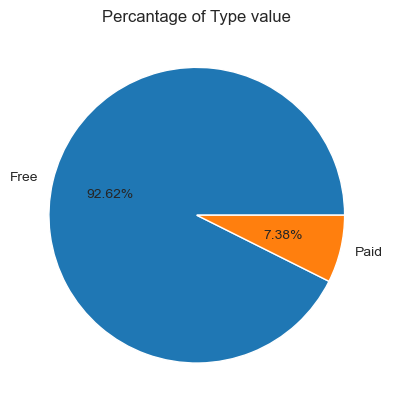

In [1024]:
plt.pie(pie["Type"],labels=pie["index"],autopct="%0.2f%%")
plt.title("Percantage of Type value")
plt.show()

In [1025]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver,Last_Updated_Year,Last_Updated_Month
0,4.355385,4.1,10000,26.895803,1533,Free,0.0,Everyone,Art & Design,4.0,2018,1
1,4.355385,3.9,10000,24.292712,539,Free,0.0,Everyone,Art & Design;Pretend Play,4.0,2018,1
2,4.355385,4.7,100000,20.730339,752,Free,0.0,Everyone,Art & Design,4.0,2018,8
3,4.355385,4.5,2000000,29.472252,828,Free,0.0,Teen,Art & Design,4.2,2018,6
4,4.355385,4.3,10000,14.206464,1169,Free,0.0,Everyone,Art & Design;Creativity,4.4,2018,6


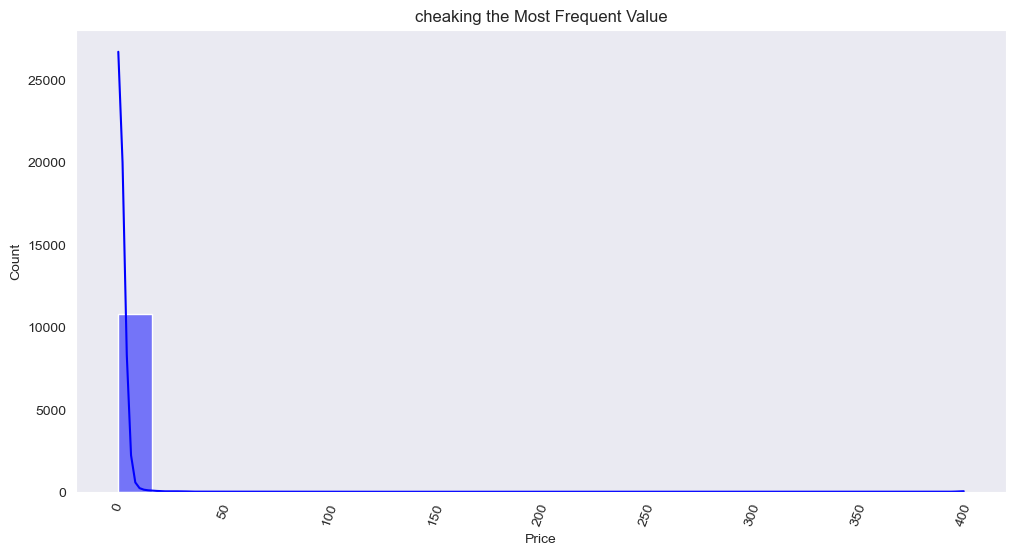

In [1026]:
sns.set_style("dark")
plt.figure(figsize=(12,6))
sns.histplot(df["Price"],bins=25,color="blue",kde=True)
plt.xticks(rotation=70)
plt.title("cheaking the Most Frequent Value")
plt.show()

In [1027]:
#This mathematical function helps user to calculate cube root of x for all x being the array elements.
df["Price"] = np.cbrt(df["Price"])

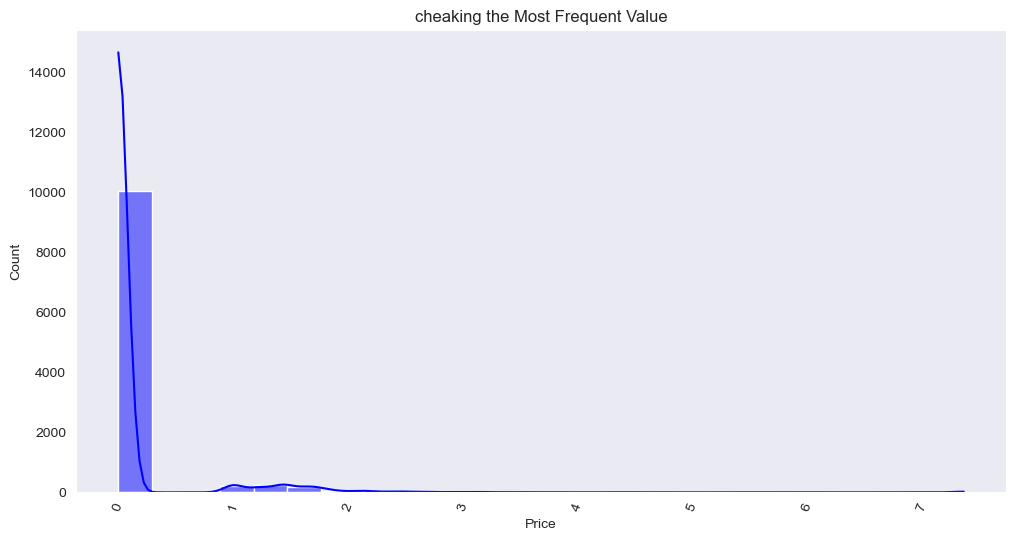

In [1028]:
sns.set_style("dark")
plt.figure(figsize=(12,6))
sns.histplot(df["Price"],bins=25,color="blue",kde=True)
plt.xticks(rotation=70)
plt.title("cheaking the Most Frequent Value")
plt.show()

In [1029]:
df["Price"].value_counts()

0.000000    10040
0.996655      148
1.440645      129
1.257818       73
1.708835       72
1.586077       63
1.142165       46
1.816111       30
1.355397       26
2.153716       21
1.912020       13
7.368002       12
2.465664       11
1.649740        9
3.106887        7
2.923628        7
1.516847        7
1.999166        7
1.764104        6
2.713965        6
2.288792        5
1.865298        5
2.350732        5
2.079313        5
2.154435        3
2.570777        3
1.000000        3
1.259921        3
2.409568        2
2.040027        2
2.620256        2
1.193483        2
1.580759        2
4.308690        2
1.956563        2
2.080084        2
2.223306        2
3.419667        2
3.239294        2
1.251465        1
2.686997        1
1.686865        1
1.485792        1
1.661897        1
2.491169        1
1.448631        1
1.624872        1
1.375069        1
1.373304        1
1.574061        1
5.371570        1
1.663103        1
3.071964        1
1.434192        1
1.426043        1
1.253590  

In [1030]:
df.drop(columns=["Price"],inplace=True)

In [1031]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Android Ver,Last_Updated_Year,Last_Updated_Month
0,4.355385,4.1,10000,26.895803,1533,Free,Everyone,Art & Design,4.0,2018,1
1,4.355385,3.9,10000,24.292712,539,Free,Everyone,Art & Design;Pretend Play,4.0,2018,1
2,4.355385,4.7,100000,20.730339,752,Free,Everyone,Art & Design,4.0,2018,8
3,4.355385,4.5,2000000,29.472252,828,Free,Teen,Art & Design,4.2,2018,6
4,4.355385,4.3,10000,14.206464,1169,Free,Everyone,Art & Design;Creativity,4.4,2018,6


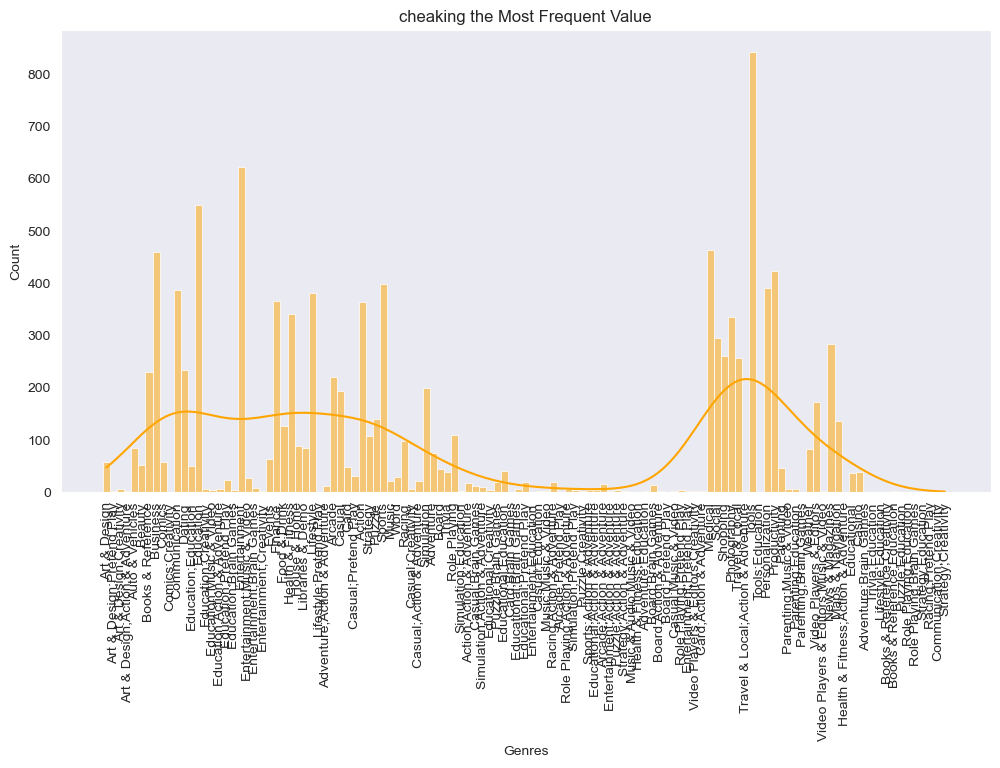

In [1032]:
sns.set_style("dark")
plt.figure(figsize=(12,6))
sns.histplot(df["Genres"],bins=25,color="orange",kde=True)
plt.xticks(rotation=90)
plt.title("cheaking the Most Frequent Value")
plt.show()

In [1033]:
df["Genres"]=df["Genres"].map(df["Genres"].value_counts())

In [1034]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Android Ver,Last_Updated_Year,Last_Updated_Month
0,4.355385,4.1,10000,26.895803,1533,Free,Everyone,58,4.0,2018,1
1,4.355385,3.9,10000,24.292712,539,Free,Everyone,2,4.0,2018,1
2,4.355385,4.7,100000,20.730339,752,Free,Everyone,58,4.0,2018,8
3,4.355385,4.5,2000000,29.472252,828,Free,Teen,58,4.2,2018,6
4,4.355385,4.3,10000,14.206464,1169,Free,Everyone,7,4.4,2018,6


# Copy the File 

In [1035]:
dff=df.copy()

In [1036]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Category            10840 non-null  float64
 1   Rating              10840 non-null  float64
 2   Reviews             10840 non-null  int64  
 3   Size                10840 non-null  float64
 4   Installs            10840 non-null  int64  
 5   Type                10840 non-null  object 
 6   Content Rating      10840 non-null  object 
 7   Genres              10840 non-null  int64  
 8   Android Ver         10840 non-null  float64
 9   Last_Updated_Year   10840 non-null  int32  
 10  Last_Updated_Month  10840 non-null  int64  
dtypes: float64(4), int32(1), int64(4), object(2)
memory usage: 889.3+ KB


In [1037]:
df.dtypes

Category              float64
Rating                float64
Reviews                 int64
Size                  float64
Installs                int64
Type                   object
Content Rating         object
Genres                  int64
Android Ver           float64
Last_Updated_Year       int32
Last_Updated_Month      int64
dtype: object

In [1038]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Android Ver,Last_Updated_Year,Last_Updated_Month
0,4.355385,4.1,10000,26.895803,1533,Free,Everyone,58,4.0,2018,1
1,4.355385,3.9,10000,24.292712,539,Free,Everyone,2,4.0,2018,1
2,4.355385,4.7,100000,20.730339,752,Free,Everyone,58,4.0,2018,8
3,4.355385,4.5,2000000,29.472252,828,Free,Teen,58,4.2,2018,6
4,4.355385,4.3,10000,14.206464,1169,Free,Everyone,7,4.4,2018,6


In [1039]:
#Extract the features and Target
x=df.drop("Rating",axis=1)
y=df[["Rating"]]

In [1040]:
x.head()

,Category,Reviews,Size,Installs,Type,Content Rating,Genres,Android Ver,Last_Updated_Year,Last_Updated_Month
0,4.355385,10000,26.895803,1533,Free,Everyone,58,4.0,2018,1
1,4.355385,10000,24.292712,539,Free,Everyone,2,4.0,2018,1
2,4.355385,100000,20.730339,752,Free,Everyone,58,4.0,2018,8
3,4.355385,2000000,29.472252,828,Free,Teen,58,4.2,2018,6
4,4.355385,10000,14.206464,1169,Free,Everyone,7,4.4,2018,6


In [1041]:
x=pd.get_dummies(x)
# Ln=LabelEncoder()
# for i in x:
#     if x[i].dtypes=="object":
#         x[i]=Ln.fit_transform(x[i])

In [1042]:
x.head()

,Category,Reviews,Size,Installs,Genres,Android Ver,Last_Updated_Year,Last_Updated_Month,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen
0,4.355385,10000,26.895803,1533,58,4.0,2018,1,1,0,0,1,0,0,0
1,4.355385,10000,24.292712,539,2,4.0,2018,1,1,0,0,1,0,0,0
2,4.355385,100000,20.730339,752,58,4.0,2018,8,1,0,0,1,0,0,0
3,4.355385,2000000,29.472252,828,58,4.2,2018,6,1,0,0,0,0,0,1
4,4.355385,10000,14.206464,1169,7,4.4,2018,6,1,0,0,1,0,0,0


In [1043]:
x.shape

(10840, 15)

In [1044]:
rb=RobustScaler()
x1=rb.fit_transform(x)

In [1045]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [1046]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y,test_size=0.3,random_state=48)

In [1047]:
print("-"*120)
print(f"The shape of the x_train :- {x1_train.shape}")
print("-"*120)
print(f"The shape of the y_train :- {y1_train.shape}")
print("-"*120)
print(f"The shape of the x_test :- {x1_test.shape}")
print("-"*120)
print(f"The shape of the y_test :- {y1_test.shape}")

------------------------------------------------------------------------------------------------------------------------
The shape of the x_train :- (7588, 15)
------------------------------------------------------------------------------------------------------------------------
The shape of the y_train :- (7588, 1)
------------------------------------------------------------------------------------------------------------------------
The shape of the x_test :- (3252, 15)
------------------------------------------------------------------------------------------------------------------------
The shape of the y_test :- (3252, 1)


In [1048]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=48)

In [1049]:
print("-"*120)
print(f"The shape of the x_train :- {x_train.shape}")
print("-"*120)
print(f"The shape of the y_train :- {y_train.shape}")
print("-"*120)
print(f"The shape of the x_test :- {x_test.shape}")
print("-"*120)
print(f"The shape of the y_test :- {y_test.shape}")

------------------------------------------------------------------------------------------------------------------------
The shape of the x_train :- (8672, 15)
------------------------------------------------------------------------------------------------------------------------
The shape of the y_train :- (8672, 1)
------------------------------------------------------------------------------------------------------------------------
The shape of the x_test :- (2168, 15)
------------------------------------------------------------------------------------------------------------------------
The shape of the y_test :- (2168, 1)


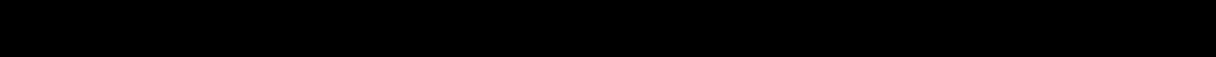

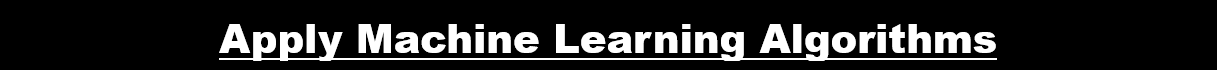

In [1050]:
train_accuracy=[]
test_accuracy=[]
models=[]

In [1051]:
def scaled_model(ml):
    ml.fit(x1_train,y1_train)
    train_ac=ml.score(x1_train,y1_train)
    test_ac=ml.score(x1_test,y1_test)
    pred=ml.predict(x1_test)
    mse=mean_squared_error(y1_test,pred)
    mae=mean_absolute_error(y1_test,pred)
    print("-"*120)
    print("-"*120)
    print(F"The machine learning Model is {ml}")
    print("-"*120)
    print(f"The Accuracy of the train Data :- {train_ac}")
    print("-"*120)
    print(f"The Accuracy of the test data :- {test_ac}")
    print("-"*120)
    print(f"Mean squared Error : - {mse}")
    print("-"*120)
    print(f"Mean Absolute Error : - {mae}")
    print("-"*120)
    print("-"*120)
    train_accuracy.append(train_ac)
    test_accuracy.append(test_ac)
    models.append(ml)

In [1052]:
def model(ml):
    ml.fit(x_train,y_train)
    train_ac=ml.score(x_train,y_train)
    test_ac=ml.score(x_test,y_test)
    pred=ml.predict(x_test)
    mse=mean_squared_error(y_test,pred)
    mae=mean_absolute_error(y_test,pred)
    print("-"*120)
    print("-"*120)
    print(F"The machine learning Model is {ml}")
    print("-"*120)
    print(f"The Accuracy of the train Data :- {train_ac}")
    print("-"*120)
    print(f"The Accuracy of the test data :- {test_ac}")
    print("-"*120)
    print(f"Mean squared Error : - {mse}")
    print("-"*120)
    print(f"Mean Absolute Error : - {mae}")
    print("-"*120)
    print("-"*120)
    train_accuracy.append(train_ac)
    test_accuracy.append(test_ac)
    models.append(ml)

In [1053]:
dt=DecisionTreeRegressor()
model(dt)

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
The machine learning Model is DecisionTreeRegressor()
------------------------------------------------------------------------------------------------------------------------
The Accuracy of the train Data :- 0.9761371135692746
------------------------------------------------------------------------------------------------------------------------
The Accuracy of the test data :- -0.7689074050695421
------------------------------------------------------------------------------------------------------------------------
Mean squared Error : - 0.4358936478867022
------------------------------------------------------------------------------------------------------------------------
Mean Absolute Error : - 0.40513840799933976
----------------------------

In [1054]:
knn=KNeighborsRegressor()
scaled_model(knn)

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
The machine learning Model is KNeighborsRegressor()
------------------------------------------------------------------------------------------------------------------------
The Accuracy of the train Data :- 0.33418664374761653
------------------------------------------------------------------------------------------------------------------------
The Accuracy of the test data :- -0.04350074665743198
------------------------------------------------------------------------------------------------------------------------
Mean squared Error : - 0.2514674046740467
------------------------------------------------------------------------------------------------------------------------
Mean Absolute Error : - 0.33287822878228784
----------------------------

In [1055]:
from sklearn.svm import SVR

In [1056]:
sv=SVR()

In [1057]:
scaled_model(sv)

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
The machine learning Model is SVR()
------------------------------------------------------------------------------------------------------------------------
The Accuracy of the train Data :- 0.07010757621483077
------------------------------------------------------------------------------------------------------------------------
The Accuracy of the test data :- 0.055658929352927045
------------------------------------------------------------------------------------------------------------------------
Mean squared Error : - 0.2275714693289901
------------------------------------------------------------------------------------------------------------------------
Mean Absolute Error : - 0.29845030485487783
--------------------------------------------

In [1058]:
from lightgbm import LGBMRegressor

In [1059]:
lg=LGBMRegressor()

In [1060]:
model(lg)

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
The machine learning Model is LGBMRegressor()
------------------------------------------------------------------------------------------------------------------------
The Accuracy of the train Data :- 0.34469886856391696
------------------------------------------------------------------------------------------------------------------------
The Accuracy of the test data :- 0.10382130064208295
------------------------------------------------------------------------------------------------------------------------
Mean squared Error : - 0.22083609424775133
------------------------------------------------------------------------------------------------------------------------
Mean Absolute Error : - 0.3023985858533286
-----------------------------------

In [1061]:
scaled_model(lg)

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
The machine learning Model is LGBMRegressor()
------------------------------------------------------------------------------------------------------------------------
The Accuracy of the train Data :- 0.35727020832193834
------------------------------------------------------------------------------------------------------------------------
The Accuracy of the test data :- 0.11444614514806617
------------------------------------------------------------------------------------------------------------------------
Mean squared Error : - 0.21340466721469334
------------------------------------------------------------------------------------------------------------------------
Mean Absolute Error : - 0.30125916011364795
----------------------------------

In [1062]:
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,ExtraTreesRegressor,BaggingRegressor

In [1063]:
ad=AdaBoostRegressor()
gr=GradientBoostingRegressor()
edt=ExtraTreesRegressor()
bag=BaggingRegressor()

In [1064]:
model(ad)


------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
The machine learning Model is AdaBoostRegressor()
------------------------------------------------------------------------------------------------------------------------
The Accuracy of the train Data :- -0.006029847689481116
------------------------------------------------------------------------------------------------------------------------
The Accuracy of the test data :- 0.01170350190561753
------------------------------------------------------------------------------------------------------------------------
Mean squared Error : - 0.24353573539994175
------------------------------------------------------------------------------------------------------------------------
Mean Absolute Error : - 0.36172009560430435
----------------------------

In [1065]:
model(gr)

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
The machine learning Model is GradientBoostingRegressor()
------------------------------------------------------------------------------------------------------------------------
The Accuracy of the train Data :- 0.16142955070749365
------------------------------------------------------------------------------------------------------------------------
The Accuracy of the test data :- 0.11365341417483699
------------------------------------------------------------------------------------------------------------------------
Mean squared Error : - 0.21841326769281366
------------------------------------------------------------------------------------------------------------------------
Mean Absolute Error : - 0.3030408245724685
-----------------------

In [1066]:
model(edt)

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
The machine learning Model is ExtraTreesRegressor()
------------------------------------------------------------------------------------------------------------------------
The Accuracy of the train Data :- 0.9761371135692746
------------------------------------------------------------------------------------------------------------------------
The Accuracy of the test data :- -0.0902976457781246
------------------------------------------------------------------------------------------------------------------------
Mean squared Error : - 0.26867082852300356
------------------------------------------------------------------------------------------------------------------------
Mean Absolute Error : - 0.31990213233747683
-----------------------------

In [1067]:
model(bag)

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
The machine learning Model is BaggingRegressor()
------------------------------------------------------------------------------------------------------------------------
The Accuracy of the train Data :- 0.8155863709763461
------------------------------------------------------------------------------------------------------------------------
The Accuracy of the test data :- -0.011555092770517028
------------------------------------------------------------------------------------------------------------------------
Mean squared Error : - 0.24926711153022593
------------------------------------------------------------------------------------------------------------------------
Mean Absolute Error : - 0.31976507320165964
------------------------------

In [1068]:
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
ct=CatBoostRegressor()
xg=XGBRegressor()

In [1069]:
model(xg)

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
The machine learning Model is XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_stat

In [1070]:
score=pd.DataFrame({"Models":models,"Test_Accuracy":test_accuracy,"Train_Accuracy":train_accuracy})

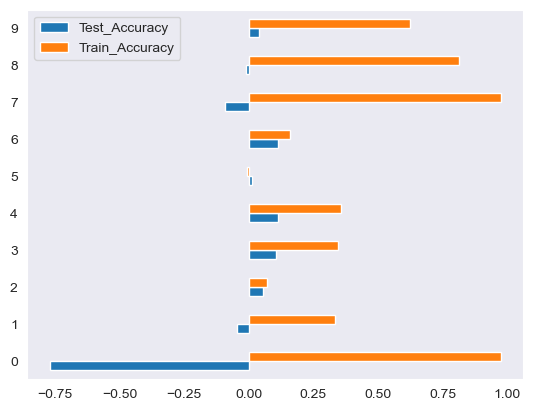

In [1071]:
score.plot(kind="barh");

In [1072]:
score

,Models,Test_Accuracy,Train_Accuracy
0,DecisionTreeRegressor(),-0.768907,0.976137
1,KNeighborsRegressor(),-0.043501,0.334187
2,SVR(),0.055659,0.070108
3,LGBMRegressor(),0.103821,0.344699
4,LGBMRegressor(),0.114446,0.357270
5,"(DecisionTreeRegressor(max_depth=3, random_sta...",0.011704,-0.006030
6,([DecisionTreeRegressor(criterion='friedman_ms...,0.113653,0.161430
7,"(ExtraTreeRegressor(random_state=591770784), E...",-0.090298,0.976137
8,(DecisionTreeRegressor(random_state=713962261)...,-0.011555,0.815586
9,"XGBRegressor(base_score=None, booster=None, ca...",0.039529,0.624974


## Conclusion


A machine learning model may not perform well in several scenarios:

Insufficient or poor-quality data: If the training data is limited, biased, or contains missing values or outliers, the model may not learn accurate patterns and struggle to make reliable predictions.

Overfitting: Overfitting occurs when a model learns the training data too well, including the noise and random fluctuations. As a result, the model performs poorly on new, unseen data. Overfitting is more likely to happen when the model is too complex relative to the amount of training data available.

Underfitting: Underfitting happens when a model is too simple to capture the underlying patterns in the data. It fails to learn the relationships and produces inaccurate predictions. Underfitting often occurs when the model is not expressive enough or the training data is insufficient.

Incorrect model choice: Different machine learning algorithms have different strengths and weaknesses. Choosing an inappropriate model for a particular problem can lead to poor performance. For example, using a linear model for a highly nonlinear problem or using a deep neural network with limited training data.

Imbalanced data: In situations where the classes or categories in the dataset are imbalanced, meaning one class has significantly more instances than the others, the model may become biased towards the majority class and perform poorly on the minority class.

Concept drift: Concept drift refers to the situation where the statistical properties of the data change over time. If the model is trained on historical data but the underlying patterns or relationships have changed in the current data, the model's performance may deteriorate.

Irrelevant features: Including irrelevant or noisy features in the model can negatively impact its performance. It can introduce noise, increase dimensionality, and make it harder for the model to learn meaningful patterns.

# So in this data set all features are negatively relation with the Target

# Here Going to apply the Classification Algorithms 

##### The target of Rating is in Decimal so Now i will Convert the all decimal Number from Whole Number with the Help np.ceil Function

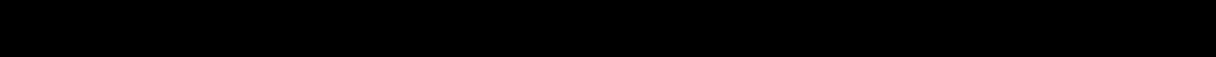

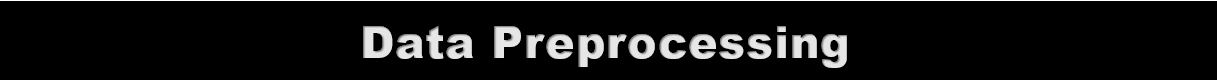

dff.head()

In [1073]:
import math
from sklearn.metrics import confusion_matrix,classification_report,f1_score,r2_score

In [1074]:
df["Rating"]=df['Rating'].apply(np.ceil).astype(int)

In [1075]:
df["Rating"].unique()

array([5, 4, 3, 2, 1])

In [1076]:
#Extract the features and Target
x=df.drop("Rating",axis=1)
y=df[["Rating"]]

In [1077]:
x=pd.get_dummies(x)

In [1078]:
sc=StandardScaler()
x1=sc.fit_transform(x)

In [1079]:
x1.shape

(10840, 15)

In [1080]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y,test_size=0.3,random_state=48)

In [1081]:
print("-"*120)
print(f"The shape of the x_train :- {x1_train.shape}")
print("-"*120)
print(f"The shape of the y_train :- {y1_train.shape}")
print("-"*120)
print(f"The shape of the x_test :- {x1_test.shape}")
print("-"*120)
print(f"The shape of the y_test :- {y1_test.shape}")

------------------------------------------------------------------------------------------------------------------------
The shape of the x_train :- (7588, 15)
------------------------------------------------------------------------------------------------------------------------
The shape of the y_train :- (7588, 1)
------------------------------------------------------------------------------------------------------------------------
The shape of the x_test :- (3252, 15)
------------------------------------------------------------------------------------------------------------------------
The shape of the y_test :- (3252, 1)


In [1082]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=48)

In [1083]:
print("-"*120)
print(f"The shape of the x_train :- {x_train.shape}")
print("-"*120)
print(f"The shape of the y_train :- {y_train.shape}")
print("-"*120)
print(f"The shape of the x_test :- {x_test.shape}")
print("-"*120)
print(f"The shape of the y_test :- {y_test.shape}")

------------------------------------------------------------------------------------------------------------------------
The shape of the x_train :- (8672, 15)
------------------------------------------------------------------------------------------------------------------------
The shape of the y_train :- (8672, 1)
------------------------------------------------------------------------------------------------------------------------
The shape of the x_test :- (2168, 15)
------------------------------------------------------------------------------------------------------------------------
The shape of the y_test :- (2168, 1)


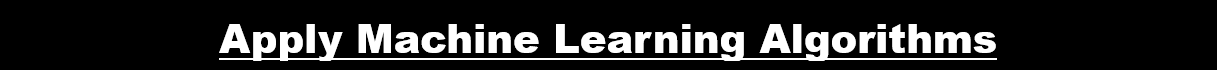

In [1084]:
train_a=[]
test_a=[]
model=[]

In [1085]:
def models(ml):
    ml.fit(x_train,y_train)
    train_ac=ml.score(x_train,y_train)
    test_ac=ml.score(x_test,y_test)
    pred=ml.predict(x_test)
    cm=confusion_matrix(y_test,pred)
    print("-"*120)
    print("-"*120)
    print(F"The machine learning Model is {ml}")
    print("-"*120)
    print(f"The Accuracy of the train Data :- {train_ac}")
    print("-"*120)
    print(f"The Accuracy of the test data :- {test_ac}")
    print("-"*120)
    print(f"condusion Matrix :- \n {cm}")
    print("-"*120)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm,annot=True,cmap="Dark2",linewidths=0.5,linecolor="black")
    plt.show()
    print("-"*120)
    print(classification_report(y_test,pred))
    print("-"*120)
    train_a.append(train_ac)
    test_a.append(test_ac)
    model.append(ml)

In [1086]:
def scale_model(ml):
    ml.fit(x1_train,y1_train)
    train_ac=ml.score(x1_train,y1_train)
    test_ac=ml.score(x1_test,y1_test)
    pred=ml.predict(x1_test)
    cm=confusion_matrix(y1_test,pred)
    print("-"*120)
    print("-"*120)
    print(F"The machine learning Model is {ml}")
    print("-"*120)
    print(f"The Accuracy of the train Data :- {train_ac}")
    print("-"*120)
    print(f"The Accuracy of the test data :- {test_ac}")
    print("-"*120)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm,annot=True,cmap="Dark2",linewidths=0.5,linecolor="black")
    plt.show()
    print("-"*120)
    print(classification_report(y1_test,pred))
    print("-"*120)
    print("-"*120)
    train_a.append(train_ac)
    test_a.append(test_ac)
    model.append(ml)

In [1087]:
from sklearn.neighbors import KNeighborsClassifier

In [1088]:
kn=KNeighborsClassifier()

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
The machine learning Model is KNeighborsClassifier()
------------------------------------------------------------------------------------------------------------------------
The Accuracy of the train Data :- 0.8093041644702161
------------------------------------------------------------------------------------------------------------------------
The Accuracy of the test data :- 0.7373923739237392
------------------------------------------------------------------------------------------------------------------------


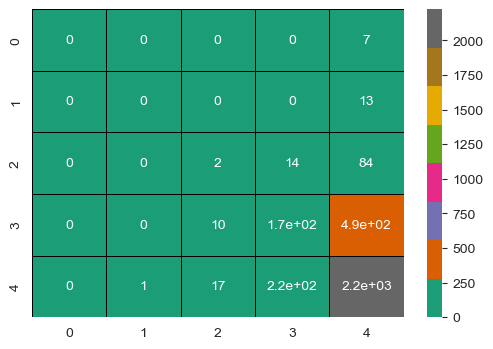

------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00        13
           3       0.07      0.02      0.03       100
           4       0.42      0.26      0.32       669
           5       0.79      0.90      0.84      2463

    accuracy                           0.74      3252
   macro avg       0.26      0.24      0.24      3252
weighted avg       0.69      0.74      0.70      3252

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


In [1089]:
scale_model(kn)

In [1090]:
from sklearn.naive_bayes import BernoulliNB,GaussianNB

In [1091]:
b=BernoulliNB()
g=GaussianNB()

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
The machine learning Model is BernoulliNB()
------------------------------------------------------------------------------------------------------------------------
The Accuracy of the train Data :- 0.7658144438587243
------------------------------------------------------------------------------------------------------------------------
The Accuracy of the test data :- 0.7570725707257072
------------------------------------------------------------------------------------------------------------------------


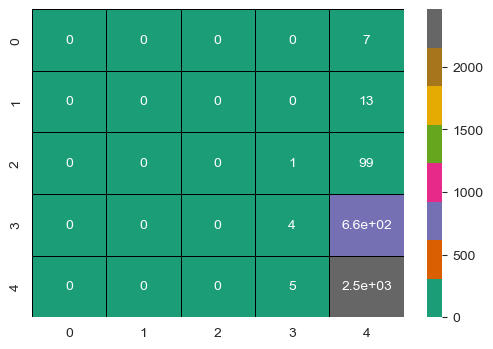

------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00       100
           4       0.40      0.01      0.01       669
           5       0.76      1.00      0.86      2463

    accuracy                           0.76      3252
   macro avg       0.23      0.20      0.17      3252
weighted avg       0.66      0.76      0.66      3252

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


In [1092]:
scale_model(b)

In [1093]:
from sklearn.svm import SVC,LinearSVC

In [1094]:
sv=SVC()

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
The machine learning Model is SVC()
------------------------------------------------------------------------------------------------------------------------
The Accuracy of the train Data :- 0.7673958882445967
------------------------------------------------------------------------------------------------------------------------
The Accuracy of the test data :- 0.7583025830258303
------------------------------------------------------------------------------------------------------------------------


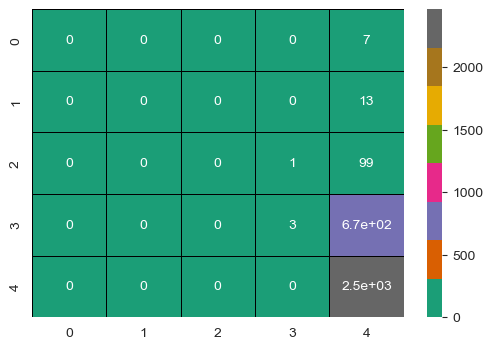

------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00       100
           4       0.75      0.00      0.01       669
           5       0.76      1.00      0.86      2463

    accuracy                           0.76      3252
   macro avg       0.30      0.20      0.17      3252
weighted avg       0.73      0.76      0.66      3252

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


In [1095]:
scale_model(sv)

In [1096]:
lsv=SVC(kernel="rbf")

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
The machine learning Model is SVC()
------------------------------------------------------------------------------------------------------------------------
The Accuracy of the train Data :- 0.7673958882445967
------------------------------------------------------------------------------------------------------------------------
The Accuracy of the test data :- 0.7583025830258303
------------------------------------------------------------------------------------------------------------------------


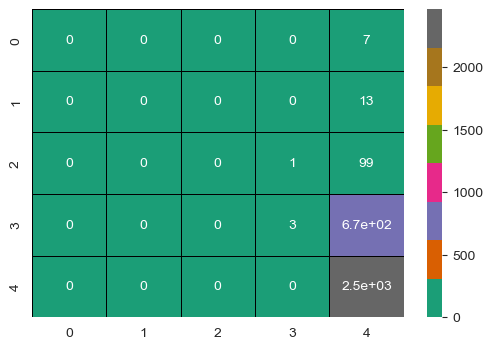

------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00       100
           4       0.75      0.00      0.01       669
           5       0.76      1.00      0.86      2463

    accuracy                           0.76      3252
   macro avg       0.30      0.20      0.17      3252
weighted avg       0.73      0.76      0.66      3252

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


In [1097]:
scale_model(lsv)

In [1098]:
svc=SVC(kernel="poly")

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
The machine learning Model is SVC(kernel='poly')
------------------------------------------------------------------------------------------------------------------------
The Accuracy of the train Data :- 0.7680548234053769
------------------------------------------------------------------------------------------------------------------------
The Accuracy of the test data :- 0.7564575645756457
------------------------------------------------------------------------------------------------------------------------


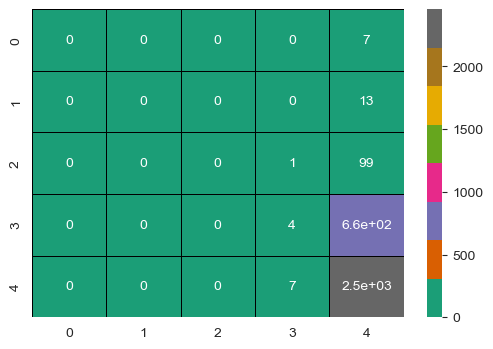

------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00       100
           4       0.33      0.01      0.01       669
           5       0.76      1.00      0.86      2463

    accuracy                           0.76      3252
   macro avg       0.22      0.20      0.17      3252
weighted avg       0.64      0.76      0.65      3252

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


In [1099]:
scale_model(svc)

In [1100]:
from sklearn.tree import DecisionTreeClassifier

In [1101]:
dtt=DecisionTreeClassifier(max_depth=10,max_leaf_nodes=20)

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
The machine learning Model is DecisionTreeClassifier(max_depth=10, max_leaf_nodes=20)
------------------------------------------------------------------------------------------------------------------------
The Accuracy of the train Data :- 0.7685654981549815
------------------------------------------------------------------------------------------------------------------------
The Accuracy of the test data :- 0.7670664206642066
------------------------------------------------------------------------------------------------------------------------
condusion Matrix :- 
 [[   0    0    0    0    6]
 [   0    0    0    0    7]
 [   0    0    0    2   68]
 [   0    0    0   33  396]
 [   0    0    0   26 1630]]
-----------------------------------------

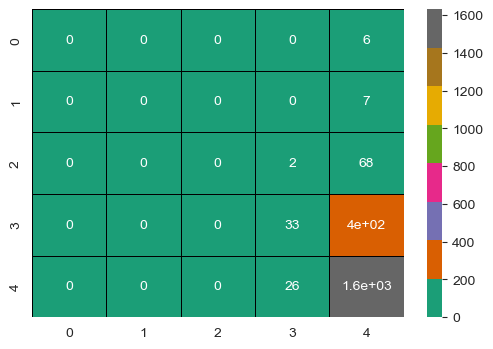

------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        70
           4       0.54      0.08      0.13       429
           5       0.77      0.98      0.87      1656

    accuracy                           0.77      2168
   macro avg       0.26      0.21      0.20      2168
weighted avg       0.70      0.77      0.69      2168

------------------------------------------------------------------------------------------------------------------------


In [1102]:
models(dtt)

In [1103]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier

In [1104]:
rn=RandomForestClassifier()
ada=AdaBoostClassifier()
grd=GradientBoostingClassifier()
exdt=ExtraTreesClassifier()

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
The machine learning Model is RandomForestClassifier()
------------------------------------------------------------------------------------------------------------------------
The Accuracy of the train Data :- 0.9929658671586716
------------------------------------------------------------------------------------------------------------------------
The Accuracy of the test data :- 0.7735239852398524
------------------------------------------------------------------------------------------------------------------------
condusion Matrix :- 
 [[   0    0    0    0    6]
 [   0    0    0    1    6]
 [   0    0    4   12   54]
 [   0    0    6  112  311]
 [   0    2   11   82 1561]]
------------------------------------------------------------------------

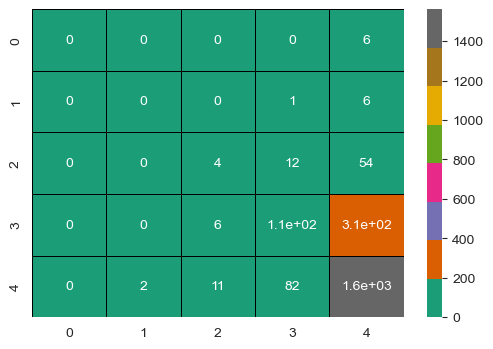

------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         7
           3       0.19      0.06      0.09        70
           4       0.54      0.26      0.35       429
           5       0.81      0.94      0.87      1656

    accuracy                           0.77      2168
   macro avg       0.31      0.25      0.26      2168
weighted avg       0.73      0.77      0.74      2168

------------------------------------------------------------------------------------------------------------------------


In [1105]:
models(rn)

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
The machine learning Model is AdaBoostClassifier()
------------------------------------------------------------------------------------------------------------------------
The Accuracy of the train Data :- 0.7142527675276753
------------------------------------------------------------------------------------------------------------------------
The Accuracy of the test data :- 0.7075645756457565
------------------------------------------------------------------------------------------------------------------------
condusion Matrix :- 
 [[   0    0    0    0    6]
 [   0    0    0    0    7]
 [   0    1    2    2   65]
 [   0    3   18    8  400]
 [   4    4   80   44 1524]]
----------------------------------------------------------------------------

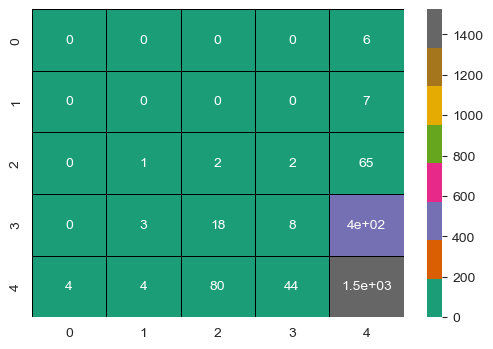

------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         7
           3       0.02      0.03      0.02        70
           4       0.15      0.02      0.03       429
           5       0.76      0.92      0.83      1656

    accuracy                           0.71      2168
   macro avg       0.19      0.19      0.18      2168
weighted avg       0.61      0.71      0.64      2168

------------------------------------------------------------------------------------------------------------------------


In [1106]:
models(ada)

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
The machine learning Model is GradientBoostingClassifier()
------------------------------------------------------------------------------------------------------------------------
The Accuracy of the train Data :- 0.7859778597785978
------------------------------------------------------------------------------------------------------------------------
The Accuracy of the test data :- 0.7624538745387454
------------------------------------------------------------------------------------------------------------------------
condusion Matrix :- 
 [[   0    0    0    0    6]
 [   0    0    0    0    7]
 [   0    0    1    3   66]
 [   0    1    2   44  382]
 [   0    0    3   45 1608]]
--------------------------------------------------------------------

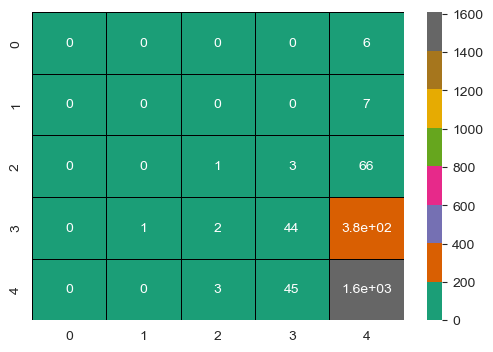

------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         7
           3       0.17      0.01      0.03        70
           4       0.48      0.10      0.17       429
           5       0.78      0.97      0.86      1656

    accuracy                           0.76      2168
   macro avg       0.28      0.22      0.21      2168
weighted avg       0.69      0.76      0.69      2168

------------------------------------------------------------------------------------------------------------------------


In [1107]:
models(grd)

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
The machine learning Model is ExtraTreesClassifier()
------------------------------------------------------------------------------------------------------------------------
The Accuracy of the train Data :- 0.9929658671586716
------------------------------------------------------------------------------------------------------------------------
The Accuracy of the test data :- 0.7624538745387454
------------------------------------------------------------------------------------------------------------------------
condusion Matrix :- 
 [[   0    0    0    0    6]
 [   0    0    0    1    6]
 [   0    0    4   13   53]
 [   0    0    8  129  292]
 [   1    4   14  117 1520]]
--------------------------------------------------------------------------

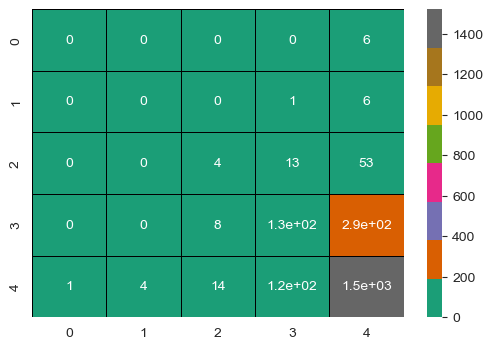

------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         7
           3       0.15      0.06      0.08        70
           4       0.50      0.30      0.37       429
           5       0.81      0.92      0.86      1656

    accuracy                           0.76      2168
   macro avg       0.29      0.26      0.26      2168
weighted avg       0.72      0.76      0.73      2168

------------------------------------------------------------------------------------------------------------------------


In [1108]:
models(exdt)

In [1109]:
from xgboost import XGBClassifier,XGBRFClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [1110]:
xg=XGBClassifier()
xgr=XGBRFClassifier()

In [1111]:
lgbm=LGBMClassifier()
catb=CatBoostClassifier()

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
The machine learning Model is LGBMClassifier()
------------------------------------------------------------------------------------------------------------------------
The Accuracy of the train Data :- 0.8680811808118081
------------------------------------------------------------------------------------------------------------------------
The Accuracy of the test data :- 0.764760147601476
------------------------------------------------------------------------------------------------------------------------
condusion Matrix :- 
 [[   0    0    0    0    6]
 [   0    0    0    0    7]
 [   0    0    2   13   55]
 [   0    0    5   84  340]
 [   2    2    4   76 1572]]
---------------------------------------------------------------------------------

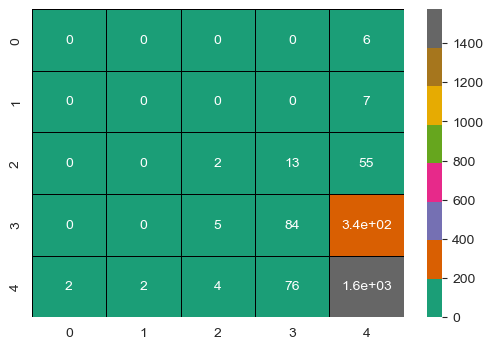

------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         7
           3       0.18      0.03      0.05        70
           4       0.49      0.20      0.28       429
           5       0.79      0.95      0.86      1656

    accuracy                           0.76      2168
   macro avg       0.29      0.23      0.24      2168
weighted avg       0.71      0.76      0.72      2168

------------------------------------------------------------------------------------------------------------------------


In [1112]:
models(lgbm)

Learning rate set to 0.088342
0:	learn: 1.4304591	total: 15.8ms	remaining: 15.8s
1:	learn: 1.3022323	total: 30.8ms	remaining: 15.3s
2:	learn: 1.2030235	total: 38ms	remaining: 12.6s
3:	learn: 1.1254628	total: 51ms	remaining: 12.7s
4:	learn: 1.0561584	total: 64.9ms	remaining: 12.9s
5:	learn: 1.0004217	total: 78.5ms	remaining: 13s
6:	learn: 0.9514339	total: 92.7ms	remaining: 13.1s
7:	learn: 0.9097918	total: 103ms	remaining: 12.8s
8:	learn: 0.8735651	total: 118ms	remaining: 13s
9:	learn: 0.8436530	total: 131ms	remaining: 13s
10:	learn: 0.8172317	total: 147ms	remaining: 13.2s
11:	learn: 0.7935897	total: 160ms	remaining: 13.2s
12:	learn: 0.7724371	total: 173ms	remaining: 13.1s
13:	learn: 0.7542738	total: 184ms	remaining: 13s
14:	learn: 0.7383540	total: 197ms	remaining: 12.9s
15:	learn: 0.7234188	total: 211ms	remaining: 13s
16:	learn: 0.7102017	total: 225ms	remaining: 13s
17:	learn: 0.6987986	total: 239ms	remaining: 13.1s
18:	learn: 0.6885852	total: 252ms	remaining: 13s
19:	learn: 0.6791156	t

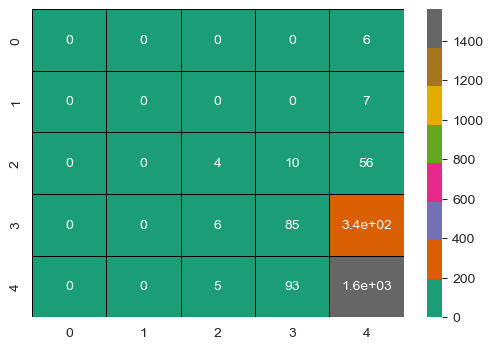

------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         7
           3       0.27      0.06      0.09        70
           4       0.45      0.20      0.28       429
           5       0.79      0.94      0.86      1656

    accuracy                           0.76      2168
   macro avg       0.30      0.24      0.25      2168
weighted avg       0.70      0.76      0.71      2168

------------------------------------------------------------------------------------------------------------------------


In [1113]:
models(catb)

vivd' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

In [1114]:
score2=pd.DataFrame({"Models":model,"Train_Accuracy":train_a,"Test_Accuracy":test_a})

In [1115]:
score2

,Models,Train_Accuracy,Test_Accuracy
0,KNeighborsClassifier(),0.809304,0.737392
1,BernoulliNB(),0.765814,0.757073
2,SVC(),0.767396,0.758303
3,SVC(),0.767396,0.758303
4,SVC(kernel='poly'),0.768055,0.756458
5,"DecisionTreeClassifier(max_depth=10, max_leaf_...",0.768565,0.767066
6,"(DecisionTreeClassifier(max_features='auto', r...",0.992966,0.773524
7,"(DecisionTreeClassifier(max_depth=1, random_st...",0.714253,0.707565
8,([DecisionTreeRegressor(criterion='friedman_ms...,0.785978,0.762454
9,"(ExtraTreeClassifier(random_state=2069811576),...",0.992966,0.762454


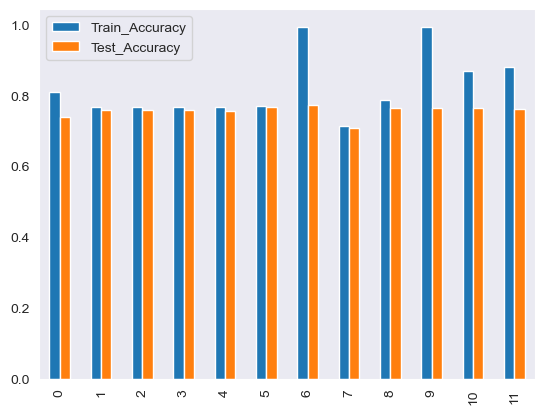

In [1116]:
score2.plot(kind="bar");

# Conclusion
* In Classification in our Model Is working Properly
* But Regression in Not working well like Classification



# Thanks